<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Supervised Learning Project : INN Hotels</center></h1>

## Problem Statement

### Business Context:

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

### Objective:

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions.

It has to be analyzed using the data provided

1. Find which factors have a high influence on booking cancellations
2. Build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

### Data dictionary


The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

* **Booking_ID**: the unique identifier of each booking
* **no_of_adults**: Number of adults
* **no_of_children**: Number of Children
* **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights**: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan**: Type of meal plan booked by the customer:
    * Not Selected  - No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
* **lead_time**: Number of days between the date of booking and the arrival date
* **arrival_year**: Year of arrival date
* **arrival_month**: Month of arrival date
* **arrival_date**: Date of the month
* **market_segment_type**: Market segment designation.
* **repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer before the current booking
* **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer before the current booking
* **avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status**: Flag indicating if the booking was canceled or not.

## Import required libraries

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to compute
import time
import sys

# stats modules
from scipy.stats import chi2_contingency

In [ ]:
# Import libraries for data split,scaling and modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# To get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)

## Configure section

In [ ]:
# set all configuration at this section
%matplotlib inline

# path to the data set
path = '/content/drive/MyDrive/SupervisedLearning/INNHotelsGroup.csv'

# float format for dataframes
pd.options.display.float_format = '{:.2f}'.format

# plot default size for visualization
plt.rcParams['figure.figsize'] = (10,5)

## Load data set

In [ ]:
# Import google colab drive
from google.colab import drive
drive.mount('/content/drive')

# read the data set
df_source = pd.read_csv(path)

# copy the source data frame
df = df_source.copy()

Mounted at /content/drive


## Understand the data

### Data types and describe stats

In [ ]:
# Print first 5 rows
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# print last 5 rows
df.tail(5)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [ ]:
# print random 5 rows
df.sample(5)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
30077   INN30078             2               0                     2   
16891   INN16892             2               0                     1   
20661   INN20662             3               0                     2   
36273   INN36274             2               0                     0   
4521    INN04522             2               0                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
30077                  4       Meal Plan 1                           0   
16891                  2       Meal Plan 1                           0   
20661                  1       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
4521                   5       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
30077        Room_Type 1         13          2018             12   
16891        Room_Type 1        168          2018              4   
20661        Room_Type 4         79          2018              7   
36273        Room_Type 1         63          2018              4   
4521         Room_Type 4         86          2018              5   

       arrival_date market_segment_type  repeated_guest  \
30077            18              Online               0   
16891            22             Offline               0   
20661             9              Online               0   
36273            21              Online               0   
4521             11              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
30077                             0                                     0   
16891                             0                                     0   
20661                             0                                     0   
36273                             0                                     0   
4521                              0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
30077               88.40                       2   Not_Canceled  
16891               85.00                       0       Canceled  
20661              146.70                       1       Canceled  
36273               94.50                       0       Canceled  
4521               102.10                       1   Not_Canceled

In [ ]:
# print the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# print the shape of the data set
df.shape

(36275, 19)

In [ ]:
# describe the categorical variables
df.describe(include='object').T

count unique           top   freq
Booking_ID           36275  36275      INN36275      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

In [ ]:
# value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print('-'*40)

Booking_ID
INN36275    1
INN00001    1
INN00002    1
INN00003    1
INN00004    1
           ..
INN00023    1
INN00024    1
INN00025    1
INN00026    1
INN00027    1
Name: count, Length: 36275, dtype: int64
----------------------------------------
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
----------------------------------------
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
----------------------------------------
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
----------------------------------------
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
----------------------------------------


In [ ]:
# print the unique values count for Booking_Id
df['Booking_ID'].nunique()

36275

In [ ]:
# value counts for room type
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [ ]:
# value counts for market segment
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [ ]:
# value counts for booking status
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [ ]:
# check the percentage for booking status
print(f"Not Cancelled booking status :{ df[df['booking_status']=='Not_Canceled'].shape[0] / df.shape[0]*100}")
print(f"Cancelled booking status :{ df[df['booking_status']=='Canceled'].shape[0] / df.shape[0]*100}")

Not Cancelled booking status :67.23638869745004
Cancelled booking status :32.76361130254997


**Observations**:

* There are **36275** rows and **19** columns in the data set

* The different data types in the data set are
    - object: 5
    - int64: 13
    - float64: 1

* The memory required for this data set is **5.3** MB
    
* Meal plan 1 is most selected one.

* Room_Type_1 is the top room type chosen.

* Most of the bookings are online

* About **67.2**% bookings are not cancelled

* About **32.8**% bookings are cancelled

* The Booking_Id column contains only unique values. This could be dropped.

In [ ]:
# describe the numerical variables
df.describe(include='number').T

count    mean   std     min     25%  \
no_of_adults                         36275.00    1.84  0.52    0.00    2.00   
no_of_children                       36275.00    0.11  0.40    0.00    0.00   
no_of_weekend_nights                 36275.00    0.81  0.87    0.00    0.00   
no_of_week_nights                    36275.00    2.20  1.41    0.00    1.00   
required_car_parking_space           36275.00    0.03  0.17    0.00    0.00   
lead_time                            36275.00   85.23 85.93    0.00   17.00   
arrival_year                         36275.00 2017.82  0.38 2017.00 2018.00   
arrival_month                        36275.00    7.42  3.07    1.00    5.00   
arrival_date                         36275.00   15.60  8.74    1.00    8.00   
repeated_guest                       36275.00    0.03  0.16    0.00    0.00   
no_of_previous_cancellations         36275.00    0.02  0.37    0.00    0.00   
no_of_previous_bookings_not_canceled 36275.00    0.15  1.75    0.00    0.00   
avg_price_per_room                   36275.00  103.42 35.09    0.00   80.30   
no_of_special_requests               36275.00    0.62  0.79    0.00    0.00   

                                         50%     75%     max  
no_of_adults                            2.00    2.00    4.00  
no_of_children                          0.00    0.00   10.00  
no_of_weekend_nights                    1.00    2.00    7.00  
no_of_week_nights                       2.00    3.00   17.00  
required_car_parking_space              0.00    0.00    1.00  
lead_time                              57.00  126.00  443.00  
arrival_year                         2018.00 2018.00 2018.00  
arrival_month                           8.00   10.00   12.00  
arrival_date                           16.00   23.00   31.00  
repeated_guest                          0.00    0.00    1.00  
no_of_previous_cancellations            0.00    0.00   13.00  
no_of_previous_bookings_not_canceled    0.00    0.00   58.00  
avg_price_per_room                     99.45  120.00  540.00  
no_of_special_requests                  0.00    1.00    5.00

In [ ]:
# value counts for arrival year
df['arrival_year'].value_counts()

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64

In [ ]:
# value counts for arrival month
df['arrival_month'].value_counts().head()

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
Name: count, dtype: int64

In [ ]:
# value counts for repeated guest
df['repeated_guest'].value_counts()

repeated_guest
0    35345
1      930
Name: count, dtype: int64

**Observations**:

* The maximum number of children in a booking is 10, while the maximum number of adults is 4, with an average of 2 adults per booking.

* The highest number of weekend nights booked is 7, and for weekdays, it’s 17. On average, 2 weekend nights and 3 weekday nights are booked.

* A maximum of 1 car parking space is required per booking.

* Some bookings are made far in advance, with the longest lead time being 443 days and an average of 85 days.

* The year 2018 had the highest number of bookings.

* October saw the highest number of bookings in a single month.

* Certain guests have made repeat bookings.

* The most cancellations by a single guest are 13, while the highest number of uninterrupted bookings is 58.

* The average room price is approximately 103 Euros, with a maximum price of 540 Euros.

* The highest number of special requests made for a single booking is 5.

### **Treat missing Values**

In [ ]:
# check if there are missing values
df.isna().values.any()

False

**Observations**:

There are no missing values in the data set

### **Treat duplicated values**

In [ ]:
# check if ther are any duplicated values
df.duplicated().sum()

0

**Observations**:

There are no duplicated values

## Exploratory Data Analysis

### Univarient Analysis

#### Numerical variables

In [ ]:
df.select_dtypes(include='number').columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [ ]:
df['lead_time'].nunique()

352

**Observations**:

Though the above variables are numeric many of them are categorical in nature. Hence only the below variables are analyzed as numerical variables.

* lead_time ( many values )
* avg_price_per_room

##### function to plot histogram and boxplot

In [ ]:
# This function plots the box plot and histogram for numerical features in univarient analysis
def boxplot_histogram(data, feature, figsize=(15,8), kde=True, bins=None):
  """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
  """
  fig, (axes_box, axes_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.35, 0.65)}, figsize=figsize)

  # boxplot
  sns.boxplot(data=data, x=feature, ax=axes_box, showmeans=True, color="violet")

  # histogram
  if bins :
    sns.histplot(data=data, x=feature, ax=axes_hist, kde=kde, bins=bins)
  else:
    sns.histplot(data=data, x=feature, ax=axes_hist, kde=kde)

  # set mean and median in histogram
  axes_hist.axvline(data[feature].mean(), color='green', linestyle='--')
  axes_hist.axvline(data[feature].median(), color='black', linestyle='-')
  plt.show()

##### lead_time

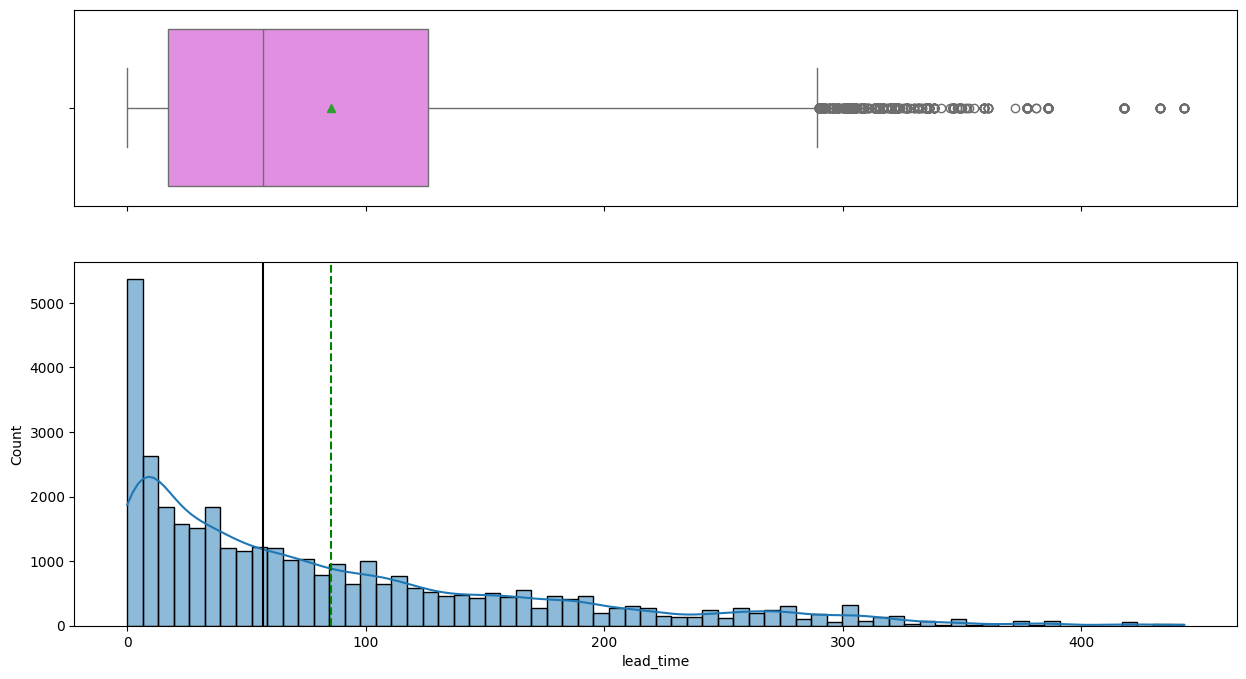

In [ ]:
boxplot_histogram(df,'lead_time')

**Observations**:

* The lead time distribution is right skewed
* Numerous outliers are present above the upper bound.

##### avg_price_per_room

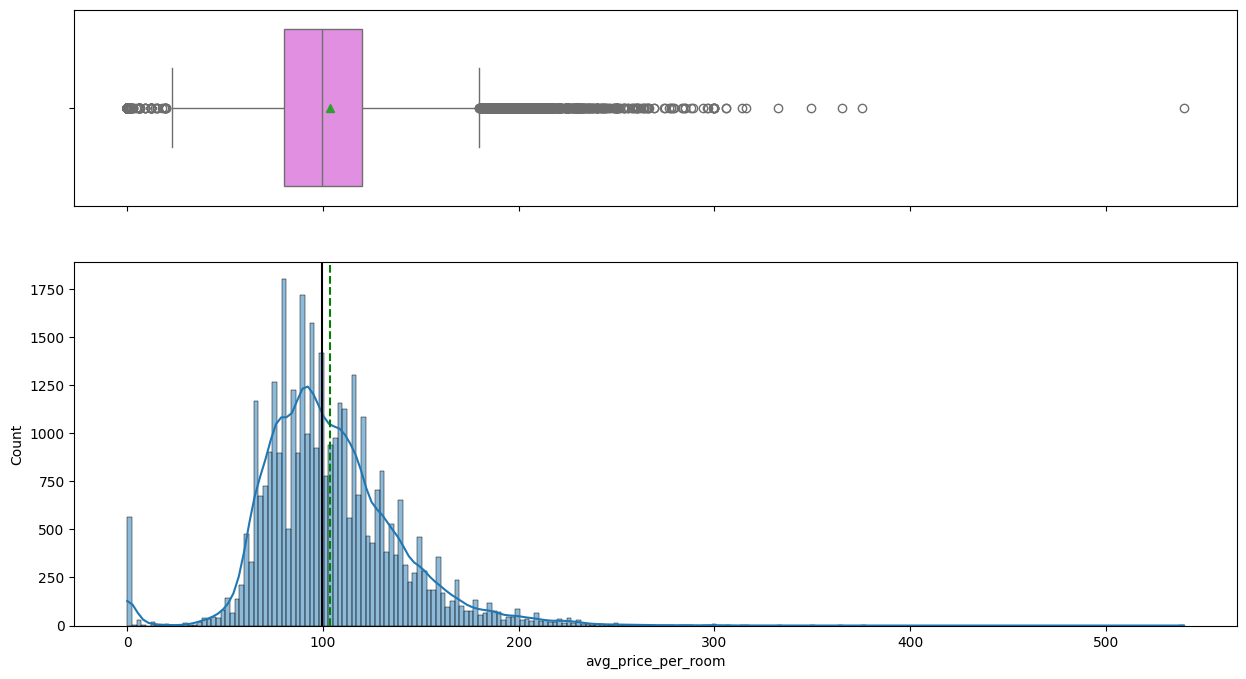

In [ ]:
boxplot_histogram(df,'avg_price_per_room')

**Observations**:

* The average price of the room is slightly right skewed
* The distribution is approximately normal
* Outliers are present on both the upper and lower boundaries

##### function to plot sub count plots

In [ ]:
# plot a barplot with labels for given features
def labelled_barplot(data, features,cols=1,figsize=None, legend=True, bivarient=False):
  rows = (len(features)+cols - 1)//cols
  if figsize is None:
    plt.figure(figsize=(cols*6,rows*4))
  else:
    plt.figure(figsize=figsize)


  for i,feature in enumerate(features):
    plt.subplot(rows,cols,i+1)

    if bivarient == True:
      hue='booking_status'
    else:
      hue = feature

    ax = sns.countplot(data, x=feature,palette="Paired",hue=hue,order=df[feature].value_counts().index)
    for container in ax.containers:
      ax.bar_label(container, fmt='%d', fontsize=10)
    ax.set_title(f'Count plot - {feature}')

    ax.tick_params(axis='x', rotation=90)
    if legend == False :
      ax.legend_.remove()

  plt.tight_layout()
  plt.show()

##### no_of_adults, no_of_children

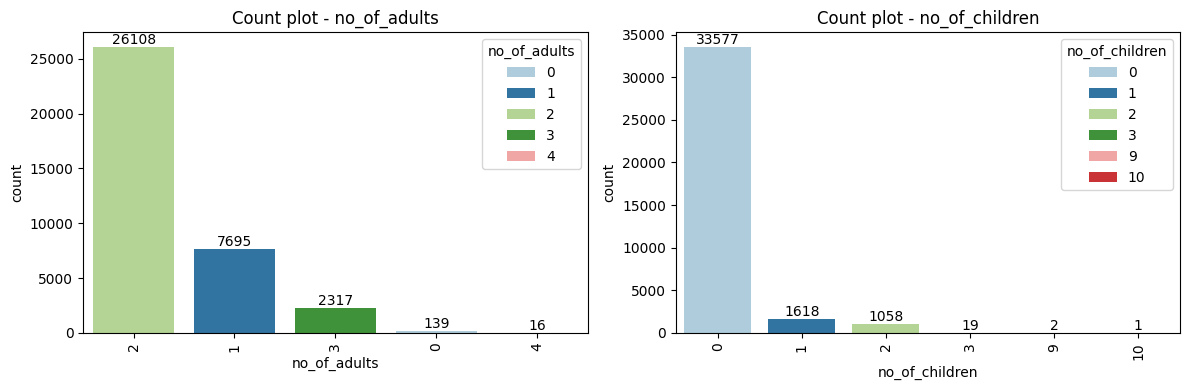

In [ ]:
labelled_barplot(df,['no_of_adults','no_of_children'],2)

**Observations**:

* Many rooms are booked for 2 adults, followed by those booked for 1 and 3 adults.
* Some rooms are exclusively booked for children without adults.
* The majority of rooms are booked without children.

##### no_of_weekend_nights, no_of_week_nights

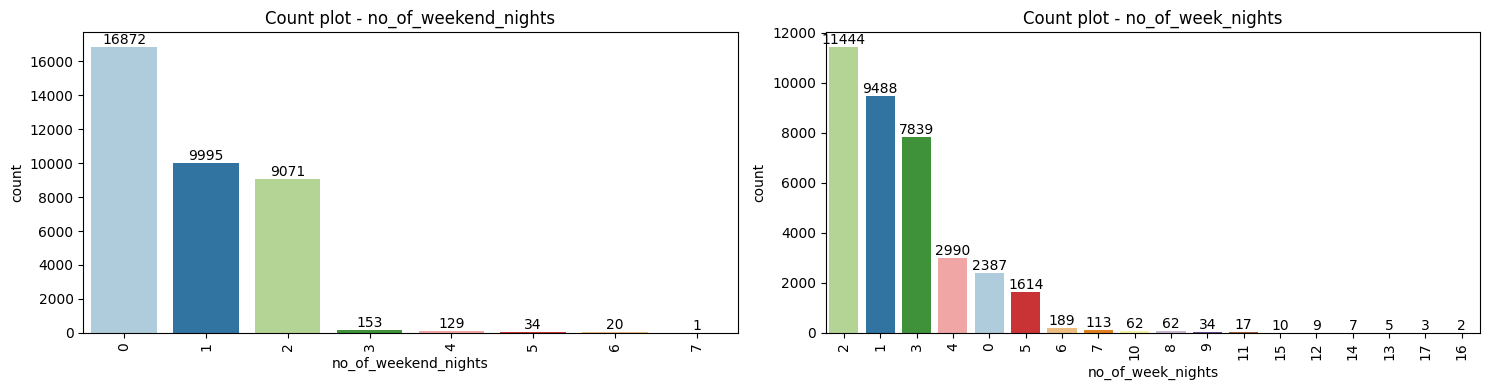

In [ ]:
labelled_barplot(df,['no_of_weekend_nights', 'no_of_week_nights'],2,figsize=(15,4), legend=False)

**Observations**:

* The majority of bookings do not include weekend nights.
* Rooms are typically booked for two days during weekdays in most cases.
* A few bookings extend beyond two weeks.

##### required_car_parking_space, repeated_guest

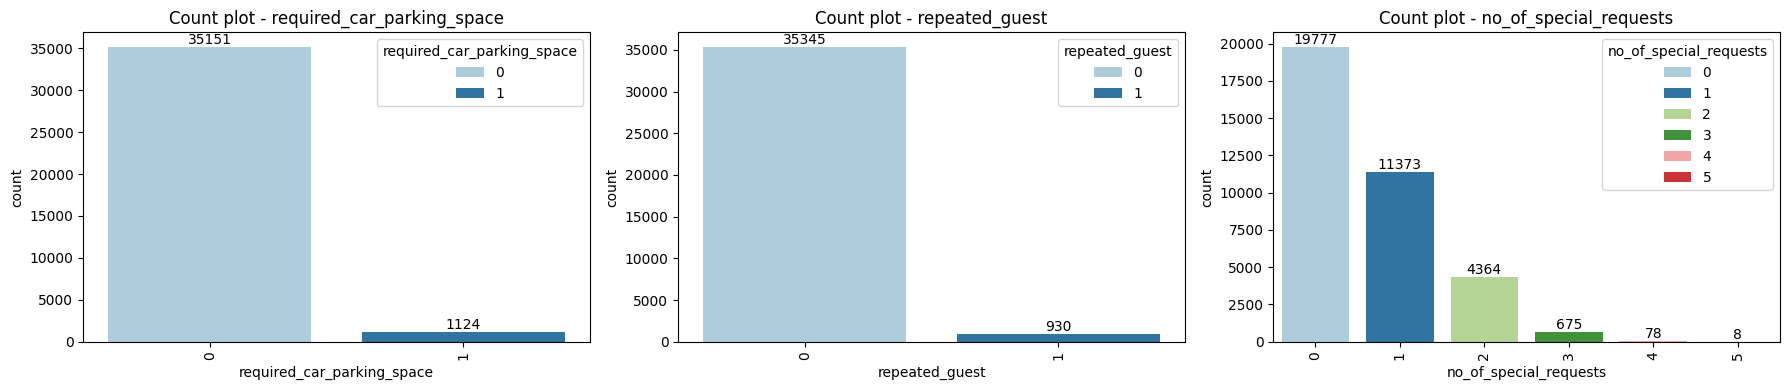

In [ ]:
labelled_barplot(df,['required_car_parking_space','repeated_guest','no_of_special_requests'],3)

**Observations**:

* The majority of bookings exclude car parking space.
* Repeat guests constitute a very small percentage, approximately 2%.
* Most bookings either have no special requests or include only one special request

##### arrival_year, arrival_month

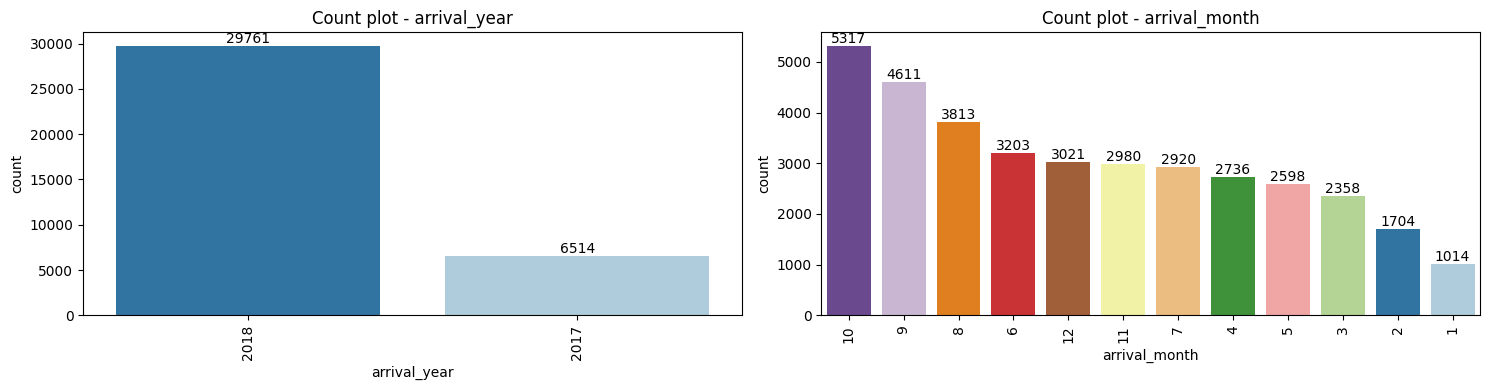

In [ ]:
labelled_barplot(df, ['arrival_year', 'arrival_month'], 2,figsize=(15,4),legend=False)

**Observations**:

* The number of bookings saw a significant increase in 2018 compared to 2017.
* The majority of bookings occur during the months of October and September.

**Question**: What are the busiest months in the hotel?

From the above plot majority of the bookings occur during the months of **October** and **September**.

Lets see how many of those bookings not cancelled ...

In [ ]:
df[df['booking_status'] == 'Not_Canceled']['arrival_month'].value_counts().head(3)

arrival_month
10    3437
9     3073
12    2619
Name: count, dtype: int64

**The busiest months are October and September**

##### arrival_date

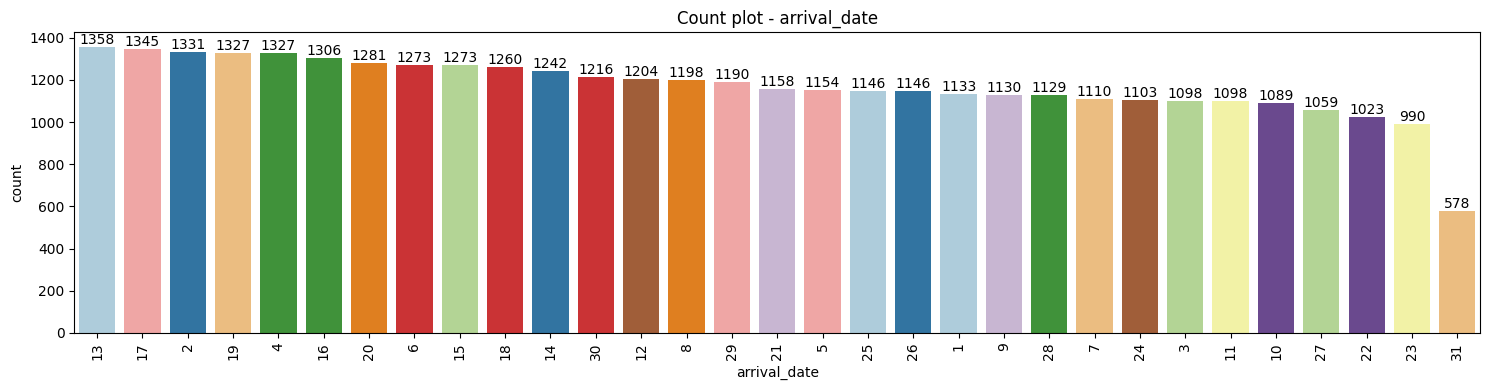

In [ ]:
labelled_barplot(df, ['arrival_date'], 1,figsize=(15,4),legend=False)

**Observations**:

* The highest number of arrivals occurred on days 13, 17, and 2.
* The lowest number of arrivals occurred on days 31, 23, and 22.

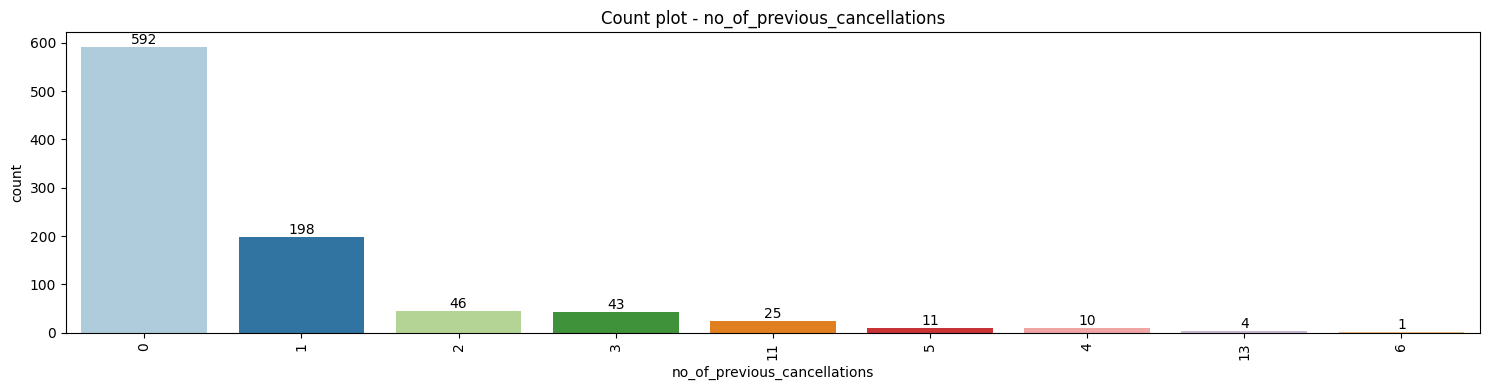

In [ ]:
labelled_barplot(df[df['repeated_guest']==1],['no_of_previous_cancellations'],1,figsize=(15,4),legend=False)

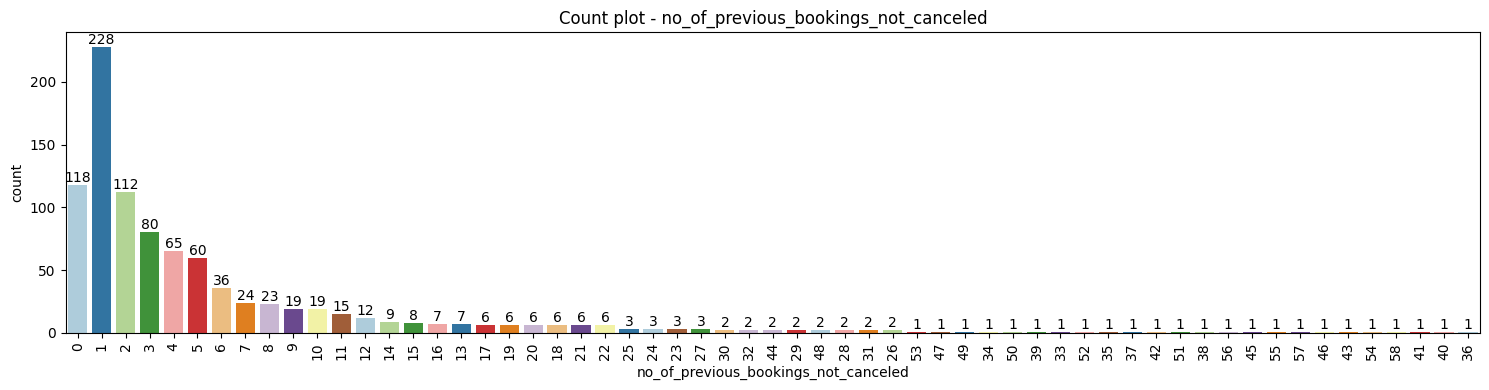

In [ ]:
labelled_barplot(df[df['repeated_guest']==1] ,['no_of_previous_bookings_not_canceled'],1,figsize=(15,4),legend=False)

**Observations**:

* The number of previous cancellations are none for most of the repeated customers.

* The number of previous bookings not cancelled are high at 0 and 1.

#### Categorical Variables

In [ ]:
df.select_dtypes(include='object').columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

* Booking_ID is unique field that varies with each unique. so univarient analysis is not done

* Univarient analysis is performed on the below inputs fields
    - type_of_meal_plan
    - room_type_reserved
    - market_segment_type
    
  and output variable
    - booking_status

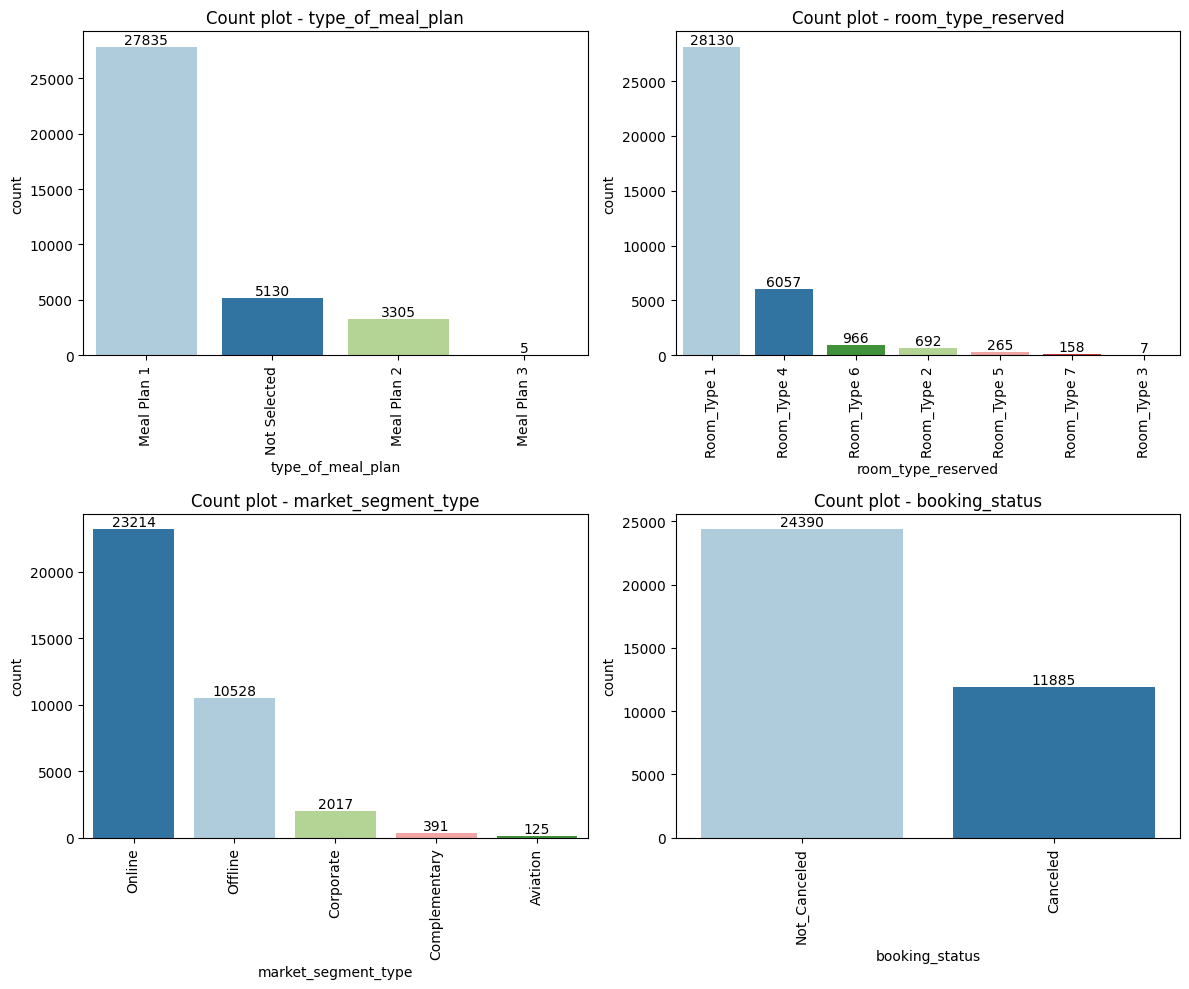

In [ ]:
labelled_barplot(df,['type_of_meal_plan', 'room_type_reserved','market_segment_type', 'booking_status'],2,figsize=(12,10))

**Observations**:

* The majority of bookings include Meal Plan 1 (breakfast).
* Only a small number of bookings opt for Meal Plan 3 (breakfast, lunch, and dinner).
* Room_Type 1 is the most frequently booked, while Room_Type 3 has the fewest bookings.
* Most bookings are made through **online market segment**.
* Approximately 30% of bookings are canceled.

**Question**: Which market segment do most of the guests come from?

In [ ]:
df[df['booking_status'] == 'Not_Canceled']['market_segment_type'].value_counts()

market_segment_type
Online           14739
Offline           7375
Corporate         1797
Complementary      391
Aviation            88
Name: count, dtype: int64

**Most of the guests come through online market segment**

**Question**: What percentage of bookings are canceled?


In [ ]:
print(f"Percentage of canceled status = {(df[df['booking_status']=='Canceled'].shape[0]/df.shape[0])*100}")

Percentage of canceled status = 32.76361130254997


Percentage of bookings that are canceled is **32.76**

### Bivarient Analysis

#### Heat Map

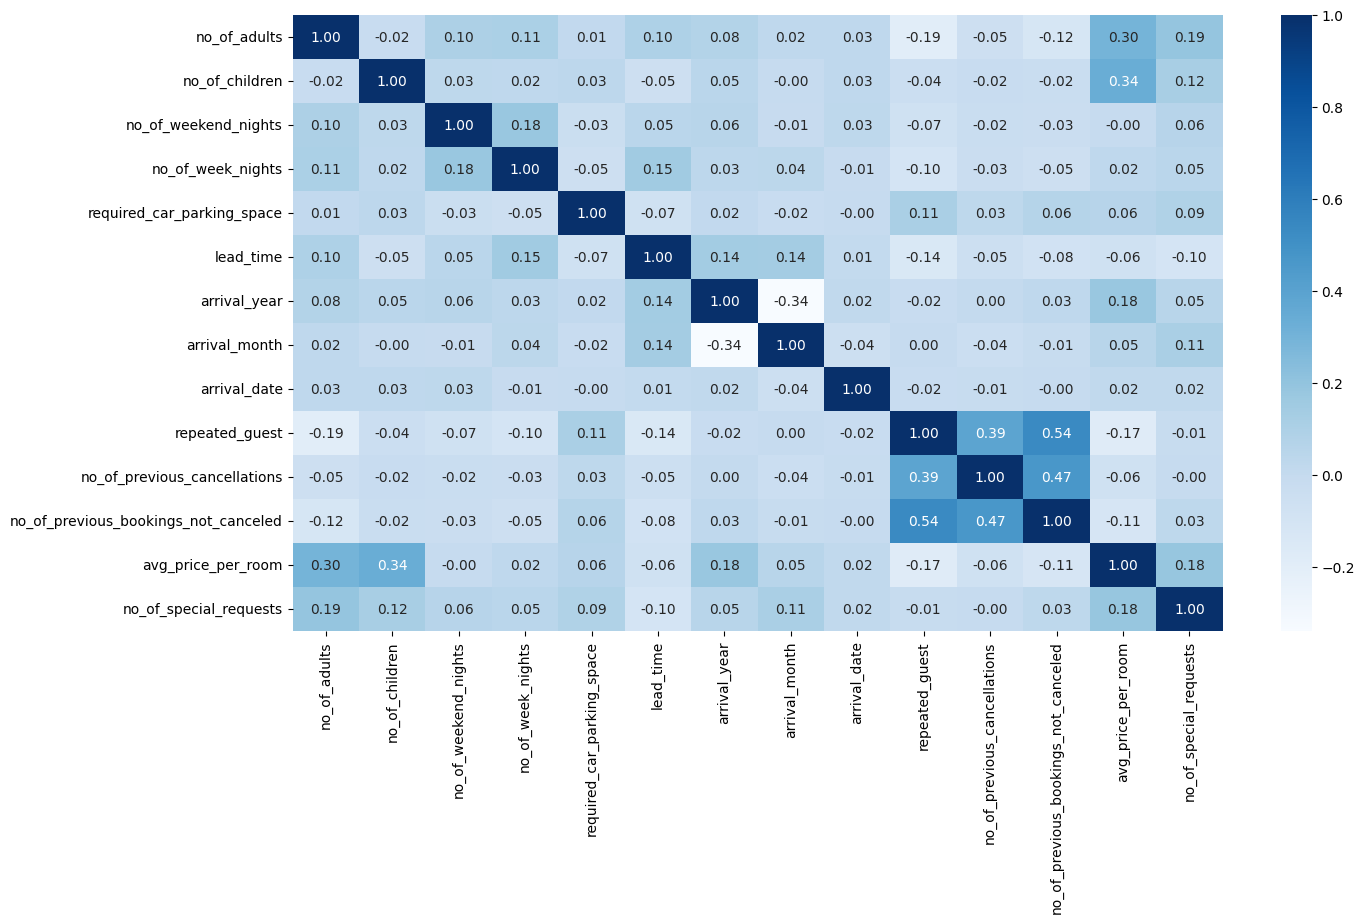

In [ ]:
# Lets analyze the correlation between variables
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",cmap='Blues')
plt.show()

**Observations**:

* There is a positive correlation between repeated guests and the number of previous bookings that were not canceled.
* A positive correlation exists between the number of previous cancellations and the number of previous bookings that were not canceled.
* A weak positive correlation is observed between the average price and the number of adults and children.
* No significant correlation is found between the other variables.

#### box plots

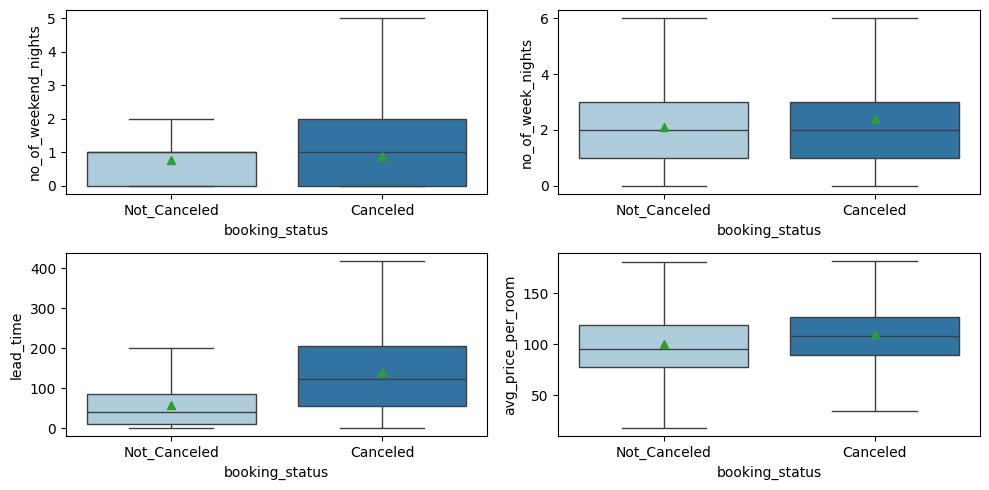

In [ ]:
biv_listn= ['no_of_weekend_nights','no_of_week_nights', 'lead_time','avg_price_per_room', ]
plt.figure(figsize=(10,5))
for i,feature in enumerate(biv_listn):
  ax=plt.subplot(2,2,i+1)
  sns.boxplot(df, x='booking_status', y=feature, hue='booking_status', palette='Paired', showfliers=False,showmeans=True)

plt.tight_layout()
plt.show()

**Observations**:

* The median number of weekend nights for canceled is slightly higher compared to non-canceled bookings.

* The median number of weeknights is almost same for both canceled and non-canceled status, but the average number of weeknights booked is slightly higher for canceled bookings.

* Bookings with longer lead times are more likely to be canceled.

* The average room price is slightly higher for canceled reservations compared to non-canceled reservations.

#### no_of_adults, no_of_children, required_car_parking_space, repeated_guest, no_of_special_requests

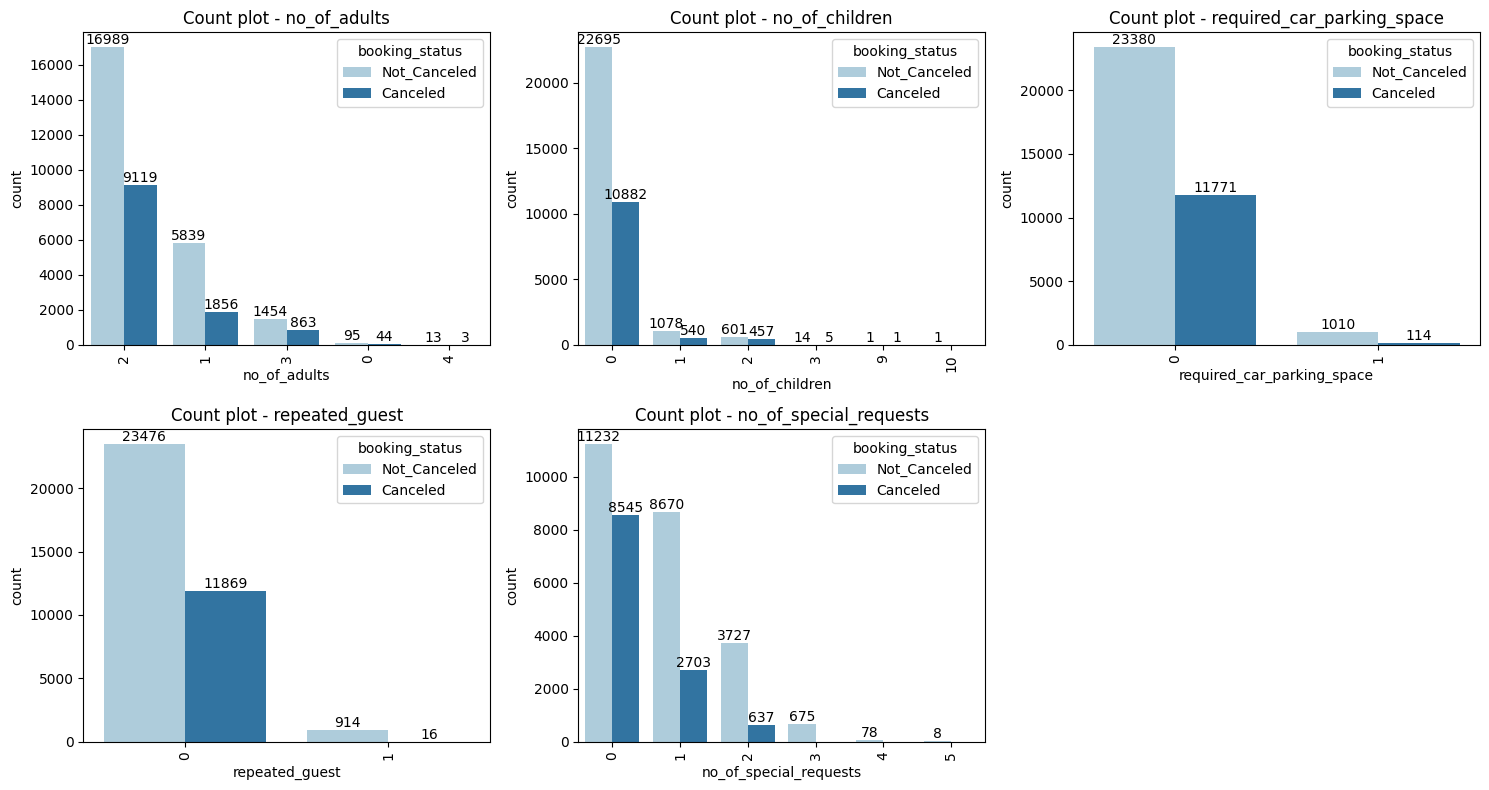

In [ ]:
biv_listc= ['no_of_adults','no_of_children','required_car_parking_space','repeated_guest','no_of_special_requests']
labelled_barplot(df,biv_listc,3,figsize=(15,8), bivarient=True)

**Observations**:

* Cancellation rates are higher when the number of adults is two.
* Cancellation rates are higher when there are no children or one in the booking.
* Cancellation rates are higher when no car parking space is requested.
* Cancellation rates are higher for new guests.
* Cancellation rates are higher when no special requests are made.





**Question**: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [ ]:
df[(df['repeated_guest'] == 1) & (df['booking_status'] == 'Canceled')].shape[0] / df[df['repeated_guest'] == 1].shape[0]

0.017204301075268817

The percentage of repeating guests who cancel is **1.72** %

#### no_of_previous_bookings_not_canceled

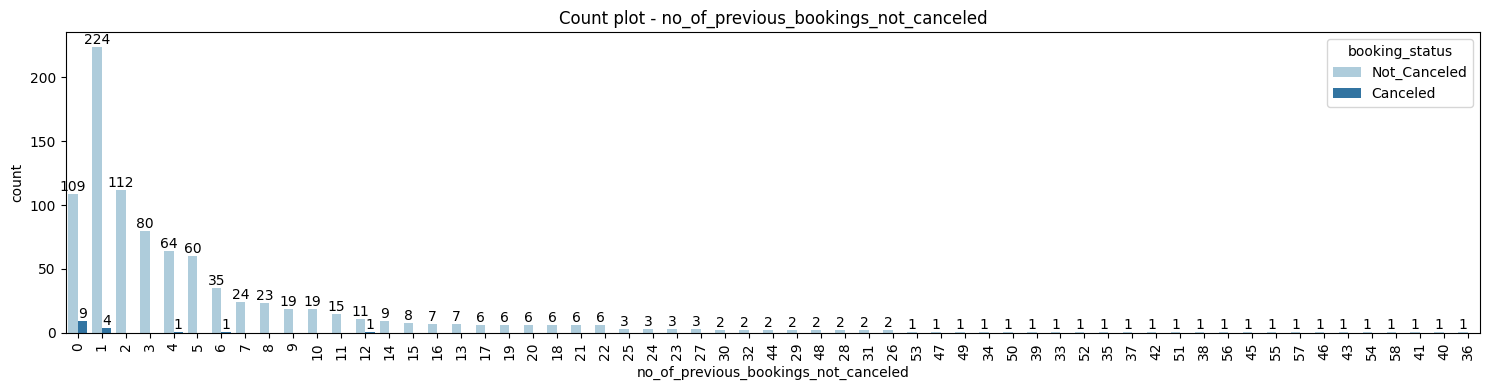

In [ ]:
labelled_barplot(df[df['repeated_guest']==1],['no_of_previous_bookings_not_canceled'],1,figsize=(15,4), bivarient=True)

**Observations**:
* For the repeated guests, the canceled bookings are very low.
* For the repeated guests, when the previous bookings not canceled increases the likelihood of canceled status is less.

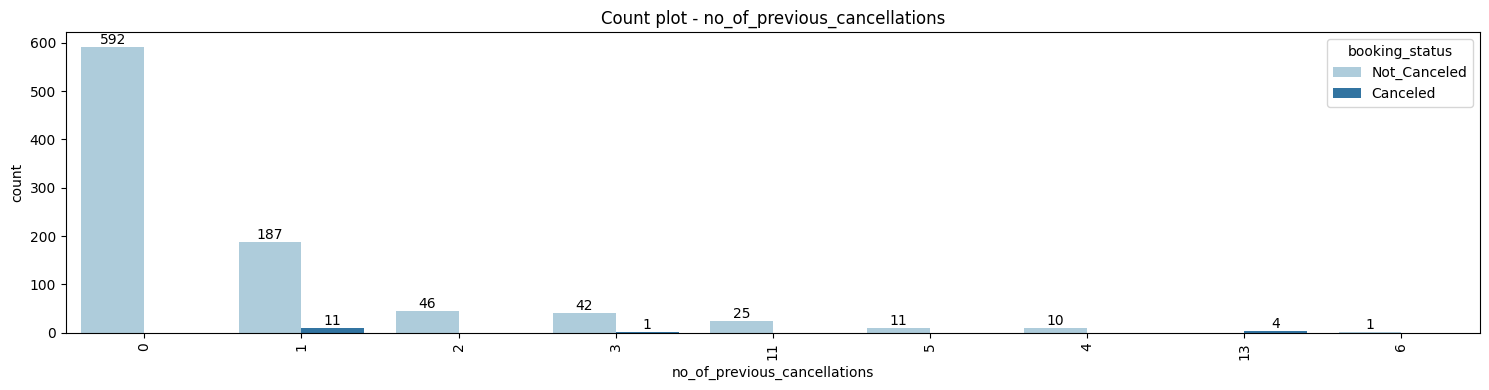

In [ ]:
labelled_barplot(df[df['repeated_guest']==1],['no_of_previous_cancellations'],1,figsize=(15,4), bivarient=True)

**Observations**:

* For repeated guests, the cancellation rate is high when the number of previous cancellations is 1 or 13.
* For all other cases, there are no cancellations.

#### Categorical variables

In [ ]:
def labelled_stacked_bar(data, feature, target):
  """
  stacked bar plot with labelled percentages

  data: dataframe
  feature: dataframe column
  target : target variable
  """
  count = data[feature].nunique()
  sorter = data[target].value_counts().index[-1]
  ctb = pd.crosstab(df[feature], df[target],margins=True).sort_values(by=sorter, ascending=False)
  print(ctb)
  print('-'*120)
  ctbp = pd.crosstab(df[feature], df[target],normalize='index').sort_values(by=sorter, ascending=False) * 100

  ax = ctbp.plot(kind='bar',stacked=True, figsize=(count+5,4))
  for container in ax.containers:
    ax.bar_label(container,fmt='%.2f%%', label_type='center')
  plt.legend(loc='upper left', bbox_to_anchor=(1,1))
  plt.title(f'{target} - {feature}')
  plt.xticks(rotation=90)
  plt.show()

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


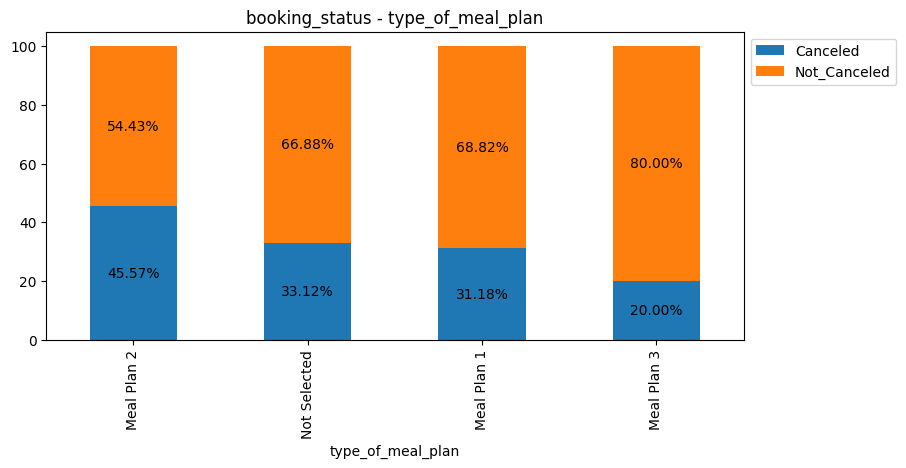

In [ ]:
labelled_stacked_bar(df, 'type_of_meal_plan','booking_status');

**Observations**:

* The percentage of cancelations is highest with Meal Plan 2 ( breakfast)
* The percentage of cancelations is least with Meal Plan 3 ( breakfast + lunch + dinner )

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


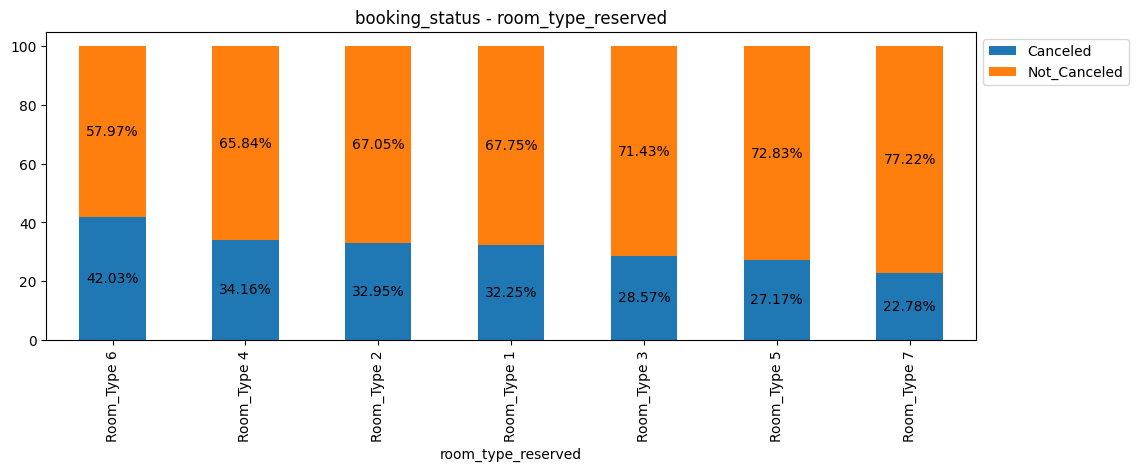

In [ ]:
labelled_stacked_bar(df, 'room_type_reserved','booking_status')

**Observations**:

* The percentage of cancellations is highest for Room_Type 6.
* The percentage of cancellations is lowest for Room_Type 7.

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


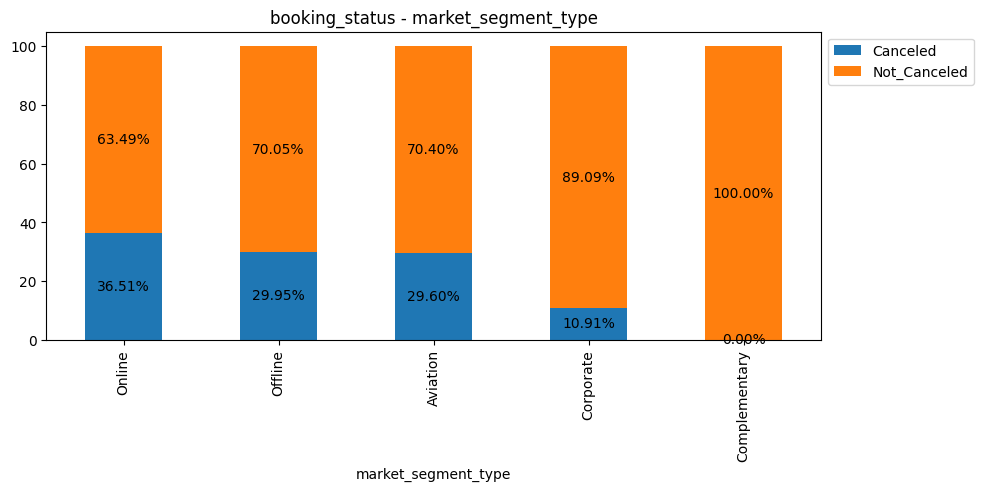

In [ ]:
labelled_stacked_bar(df, 'market_segment_type','booking_status');

**Observations**:

* Most of the cancelations are through online.
* The least cancelations are for Corporate market segment
* There are no cancelations for Complementary market segment.

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


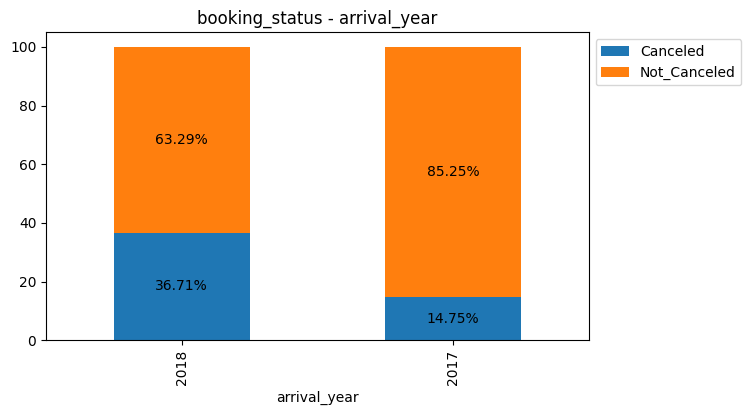

In [ ]:
labelled_stacked_bar(df, 'arrival_year','booking_status');

**Observations**:

* Most of the cancelations are in arrival year 2018

**Question**: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


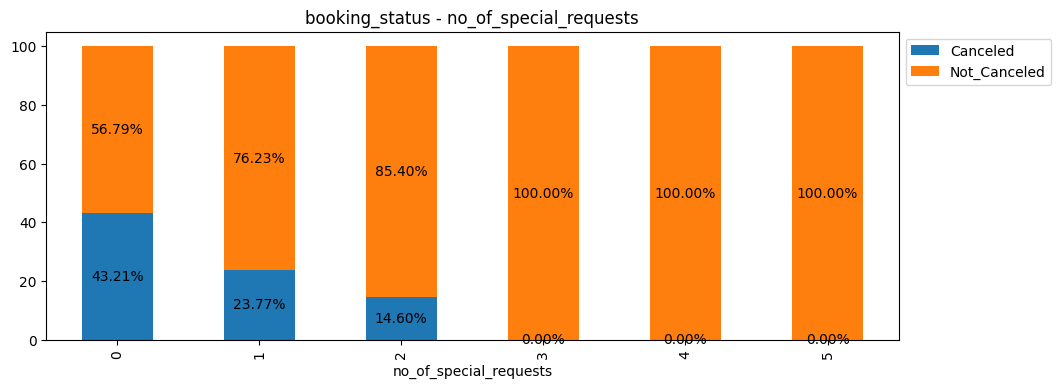

In [ ]:
labelled_stacked_bar(df, 'no_of_special_requests','booking_status');

**Observations**:
* The percentage of cancellations is highest when no special requests are made.
* The percentage of cancellations decreases when 1 or 2 special requests are made.
* There are no cancellations when the number of special requests exceeds 2.



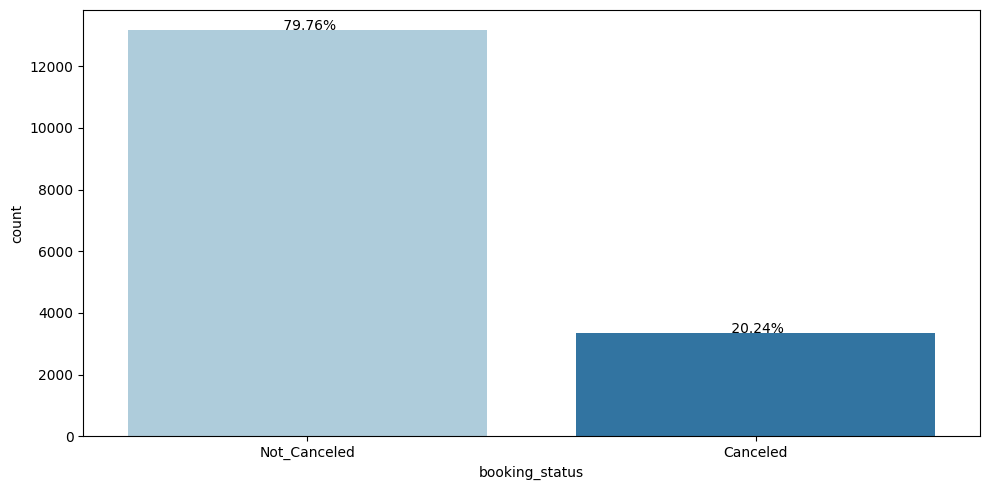

In [ ]:
# lets analyze the data when there is a special request
dfc = df[df['no_of_special_requests'] > 0]
ax = sns.countplot(dfc,x='booking_status', hue='booking_status', palette='Paired')
total = len(dfc)
for p in ax.patches:
  count = p.get_height()
  percentage = f'{( count / total ) : .2%}'
  x = p.get_x() + p.get_width() / 2
  y = p.get_height() + 0.6
  ax.annotate(percentage, (x,y), ha='center')
plt.tight_layout()
plt.show()

**Observations**:

When a special request is made, approximately 80% of the bookings are not canceled.

Based on this data, we can conclude that **making special requests reduces the likelihood of a booking being canceled**.

lets verify if these veraibles are dependent using using **Chi-Square test of independence**.

Formulate the hypothesis as below

Lets set null hypothesis as

> $H_0:$ Canceled status is independent of special requests made

against alternate hypothesis as

> $H_a:$ Canceled status is dependent on special requests made

In [ ]:
# lets compute contingency table for chi-square test
dfc = df[df['no_of_special_requests'] > 0]
contingency_table = pd.crosstab(dfc['no_of_special_requests'],df['booking_status'])
contingency_table

booking_status          Canceled  Not_Canceled
no_of_special_requests                        
1                           2703          8670
2                            637          3727
3                              0           675
4                              0            78
5                              0             8

Lets check if the ch-square test assumptions are met or not

* The two variables no_of_special_requests, booking_status are categorical in nature

*  The count of samples in each level in the contingency table is grater than 5

*  Lets assume the sampling is random and independent in nature

In [ ]:
# perform the chi-square test of independence using the function chi2_contingency
chi2_test, p_value_chi, dof, expected_freq = chi2_contingency(contingency_table)
print(f'Chi2ContingencyResult(statistic={chi2_test}, pvalue={p_value_chi}, dof={dof}, expected_freq={expected_freq})')

Chi2ContingencyResult(statistic=366.7650817719591, pvalue=4.204304971405635e-78, dof=4, expected_freq=[[2.30244999e+03 9.07055001e+03]
 [8.83486483e+02 3.48051352e+03]
 [1.36652928e+02 5.38347072e+02]
 [1.57910050e+01 6.22089950e+01]
 [1.61959025e+00 6.38040975e+00]])


The low p-value indicates sufficient statistical evidence to conclude that booking_status and no_of_special_requests are dependent

### **Multivarient Analysis**

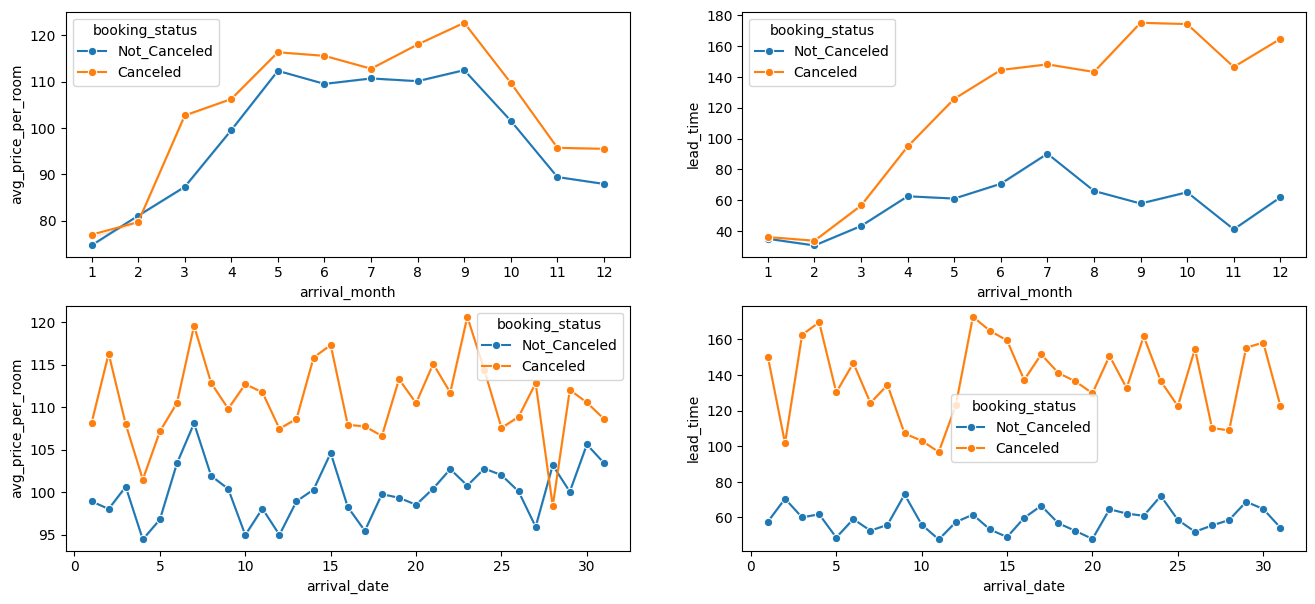

In [ ]:
plt.figure(figsize=(16,7))
for i,feature in enumerate(['avg_price_per_room','lead_time']):
  plt.subplot(2,2,i+1)
  plt.xticks([i for i in range(1,13)])
  sns.lineplot(df, x='arrival_month', y= feature, hue='booking_status', errorbar=('ci',False),marker='o');

  plt.subplot(2,2,i+3)
  sns.lineplot(df, x='arrival_date', y= feature, hue='booking_status', errorbar=('ci',False), marker='o');

plt.tight_layout
plt.show()

**Observations**:

* The average price shows an increasing trend until September, after which it declines.
* The average price is higher for canceled bookings.
* The lead time follows an increasing trend until September, after which it decreases.
* The lead time is longer for canceled bookings.

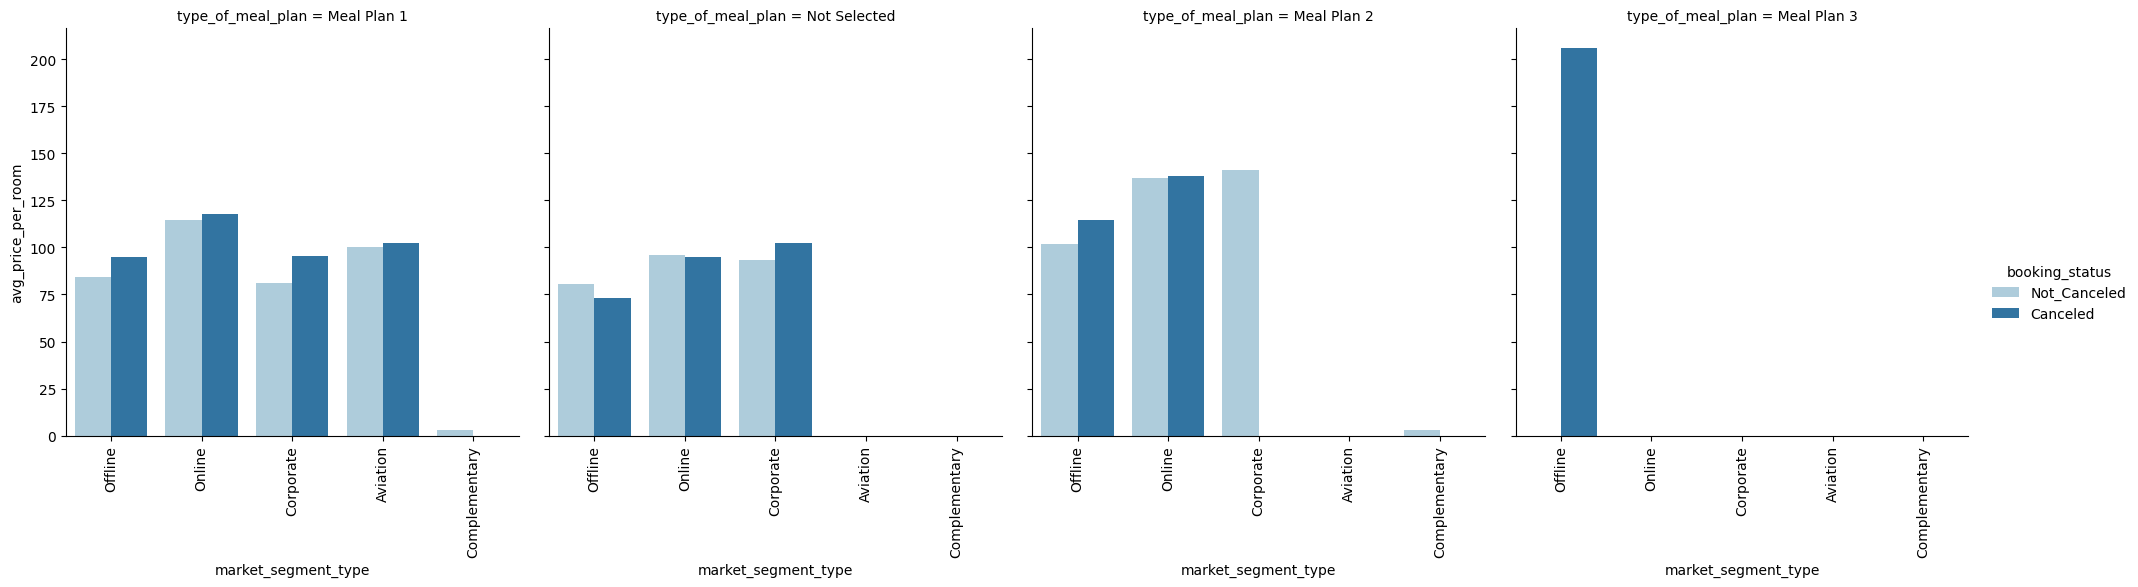

In [ ]:
g = sns.catplot(df,x='market_segment_type',y='avg_price_per_room',hue='booking_status',col='type_of_meal_plan',kind='bar',errorbar=('ci',False), palette="Paired")
g.set_xticklabels(rotation=90)
plt.show()

**Observations**:

*The average price increases with higher meal plan categories.

*The average price is slightly higher for canceled bookings.

**Question**: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

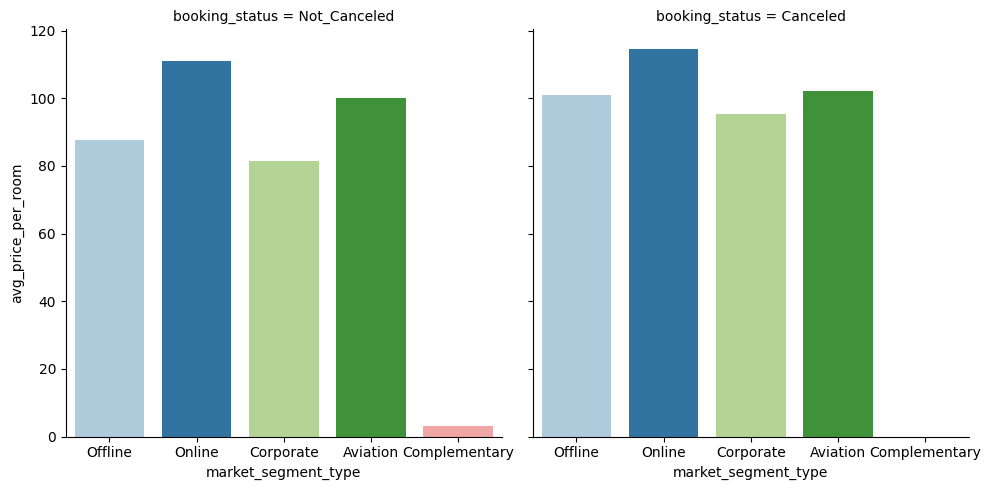

In [ ]:
sns.catplot(df, x='market_segment_type', y='avg_price_per_room', hue='market_segment_type',col='booking_status',
            kind='bar', palette='Paired', errorbar=('ci',False));

The different room prices in euros based on the market segment are as below.

In [ ]:
df.groupby('market_segment_type')['avg_price_per_room'].mean().sort_values(ascending=False)

market_segment_type
Online          112.26
Aviation        100.70
Offline          91.63
Corporate        82.91
Complementary     3.14
Name: avg_price_per_room, dtype: float64

The price for the not cancelled status in euros are as below.

In [ ]:
df[df['booking_status']=='Not_Canceled'].groupby('market_segment_type')['avg_price_per_room'].mean().sort_values(ascending=False)

market_segment_type
Online          110.89
Aviation        100.06
Offline          87.69
Corporate        81.37
Complementary     3.14
Name: avg_price_per_room, dtype: float64

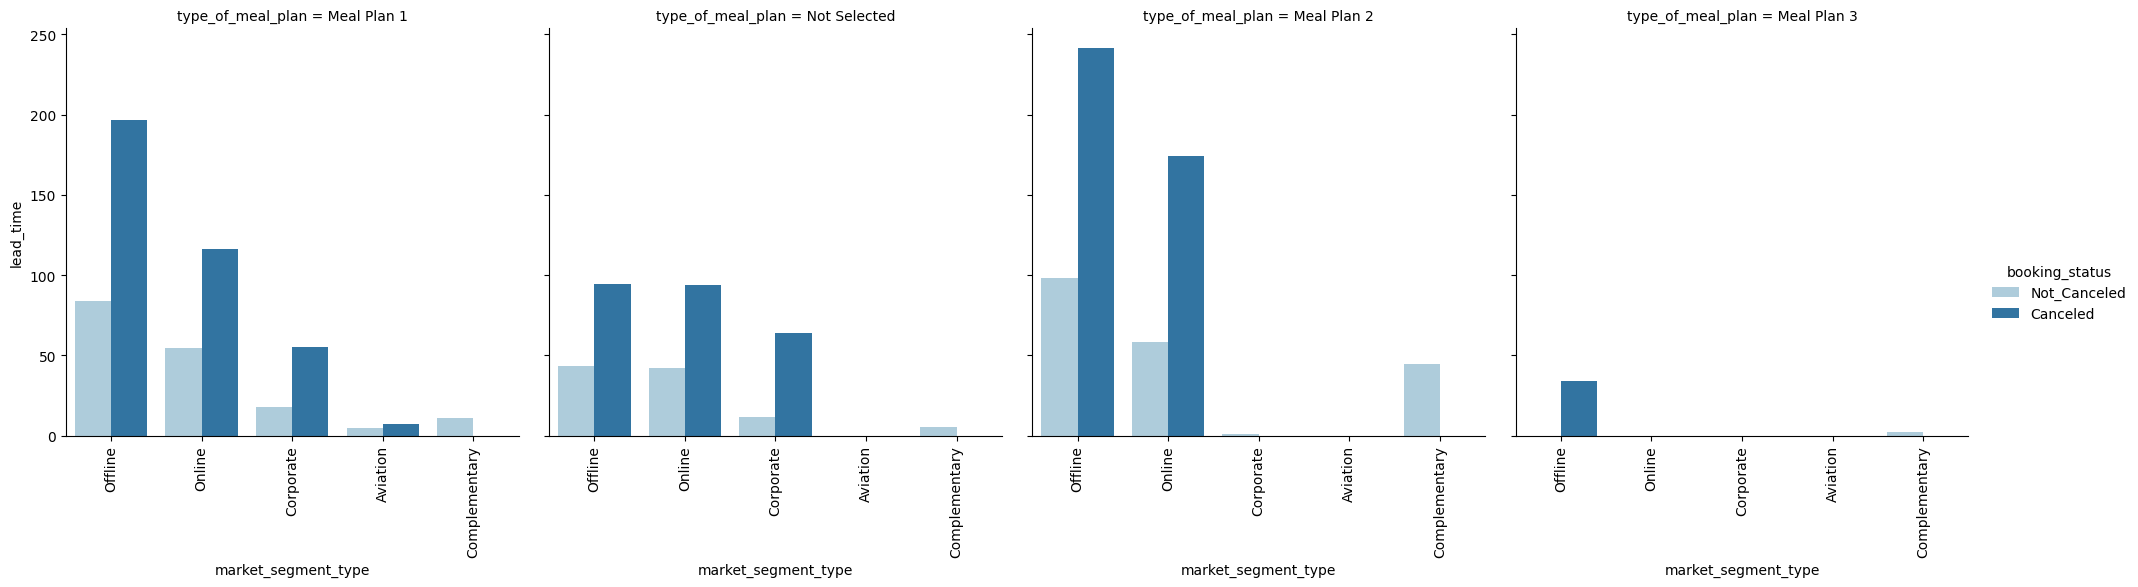

In [ ]:
g = sns.catplot(df,x='market_segment_type',y='lead_time',hue='booking_status',col='type_of_meal_plan',kind='bar',errorbar=('ci',False), palette="Paired")
g.set_xticklabels(rotation=90)
plt.show()

**Observations**:

* The lead time is longer for canceled bookings across all meal plans.
* The lead time is highest for the market segments "Online" and "Offline" under Meal Plan 2.

## Data preprocessing

### Outliers treatment

In [ ]:
# lets visualize the box plots
def visualize_box_plots():
  plt.figure(figsize=(15, 10))
  for i,feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(df, x=feature)
    plt.title(feature)

  plt.tight_layout()
  plt.show()

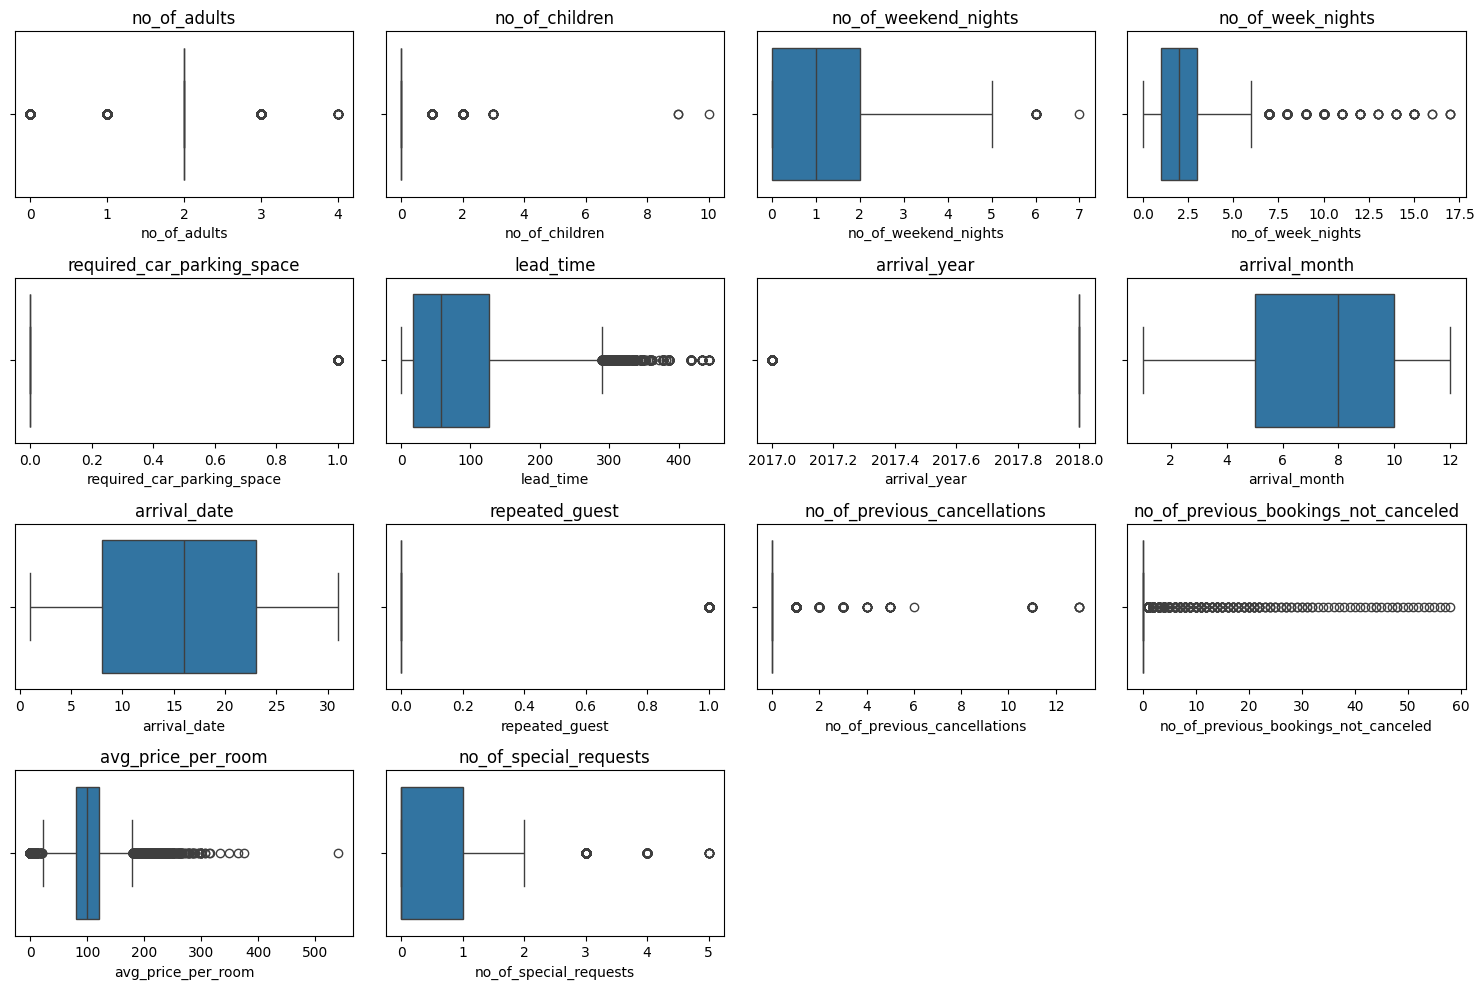

In [ ]:
visualize_box_plots()

In [ ]:
# functions to treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

**Outliers Handling**:

Outliers are assumed to be genuine and are not handled.


### Data preparation

In [ ]:
# set the list for numerical variables
num_columns = df.select_dtypes(include=np.number).columns.tolist()

# Convert the target variable to Not_Canceled => 0 and Canceled => 1
df['booking_status_code'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})
df['booking_status_code'].value_counts()

booking_status_code
0    24390
1    11885
Name: count, dtype: int64

In [ ]:
# form dependent and independent features

# drop Booking_Id, booking_status,booking_status_code in independent features
X = df.drop(['Booking_ID','booking_status','booking_status_code'], axis=1)

# store the pre-processing data
X_pp = X.copy()

Y= df['booking_status_code']

# hot encode categorical variables
X = pd.get_dummies(X, drop_first=True, dtype=int)

# split the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=1)

In [ ]:
# lets check the percentage of classes in train and test data
print(f'Percentage of classes in training set = {y_train.value_counts(normalize=True)}')
print('-'*60)
print(f'Percentage of classes in test set = {y_test.value_counts(normalize=True)}')

Percentage of classes in training set = booking_status_code
0   0.67
1   0.33
Name: proportion, dtype: float64
------------------------------------------------------------
Percentage of classes in test set = booking_status_code
0   0.68
1   0.32
Name: proportion, dtype: float64


**Observations**:

* The ratio of classes between the training and testing datasets remains consistent.
* The classes are unevenly distributed, indicating an imbalance.

### Scaling

#### Analyze the distributions

In [ ]:
# function to visualize the hist plots
def visualize_hist_plots(dfh):
  plt.figure(figsize=(15, 10))
  for i,feature in enumerate(dfh.select_dtypes(include='number').columns):
    plt.subplot(4,4,i+1)
    sns.histplot(dfh, x=feature, kde=True)
    plt.title(feature)
    plt.xticks(rotation=90)

  plt.tight_layout()
  plt.show()

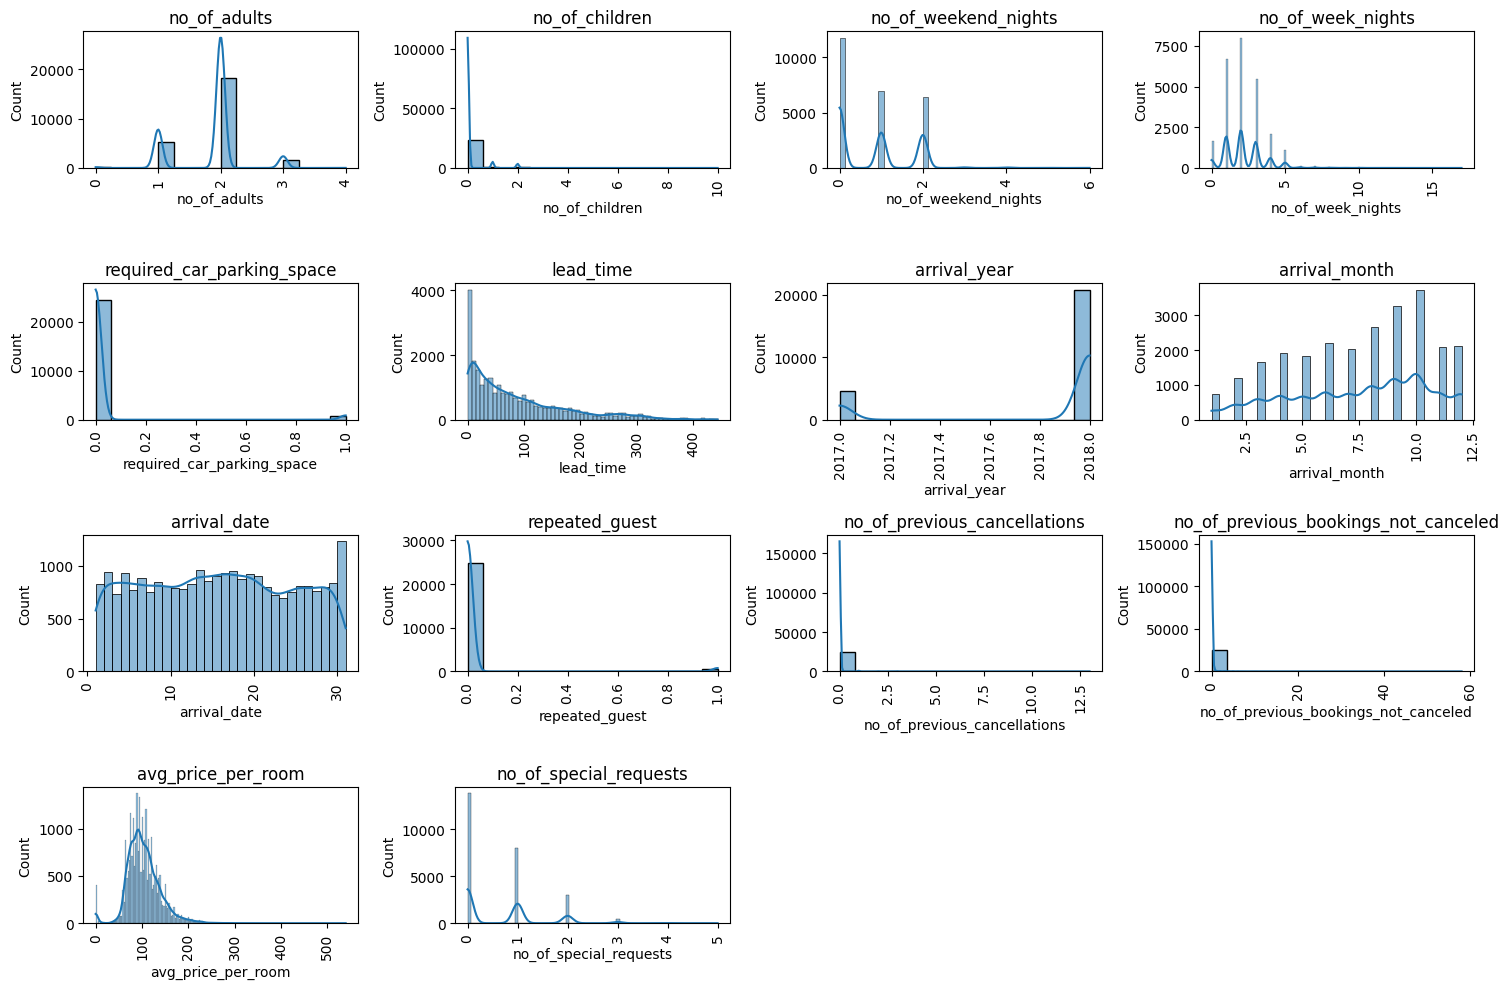

In [ ]:
# visualize the distributions of numerical features
visualize_hist_plots(X_train[num_columns])

**Scaling Aproach**:

* As there are outliers in many of the features, robust scaling is applied on all the features except the time fields

* For arrival date , arrival month and arrival year ordinal mapping is done

* On top of robust scaling, for the integer variables that are categorical in nature, min -max scaling is applied so that the features are transformed to fixed range

* on top of time fields, min-max scaling is applied.

* For binary features no scaling is applied



#### ordinal coding

In [ ]:
def ordinal_coding(dfo, feature):
  mapd = dfo[feature].value_counts(normalize=True).to_dict()
  mapc = {key: i for i, key in enumerate(mapd)}
  return dfo[feature].map(mapc)

#### Min Max Scaling

In [ ]:
# Min Max scaling of the data set
def min_max_scaling(dfmm):
  scaler = MinMaxScaler()
  scaler.fit(dfmm)
  dfmm = scaler.transform(dfmm)
  return dfmm

#### Robust Scaling

In [ ]:
def robust_scaling(dfrs):
  scaler = RobustScaler()
  dfrs = scaler.fit_transform(dfrs)
  return dfrs

In [ ]:
# store the unscaled data sets in another variables
# X_train_us = X_train
# X_test_us = X_test

# scale the train and test data sets
# robust scaling for continuous variables : avg_price_per_room
con_features = ['avg_price_per_room']
X_train[con_features] = robust_scaling(X_train[con_features])
X_test[con_features] = robust_scaling(X_test[con_features])

# ordinal encoding for time fields
time_fields = ['arrival_year',  'arrival_month', 'arrival_date' ]
for time_field in time_fields:
  X_train[time_field] = ordinal_coding(X_train, time_field)
  X_test[time_field] = ordinal_coding(X_test, time_field)

# min-max scaling for time fields
X_train[time_fields] = min_max_scaling(X_train[time_fields])
X_test[time_fields] = min_max_scaling(X_test[time_fields])

# robust and min-max scaling for categorical features
cat_features = ['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests']

#robust scaling
X_train[cat_features] = robust_scaling(X_train[cat_features])
X_test[cat_features] = robust_scaling(X_test[cat_features])

# min-max scaling
X_train[cat_features] = min_max_scaling(X_train[cat_features])
X_test[cat_features] = min_max_scaling(X_test[cat_features])

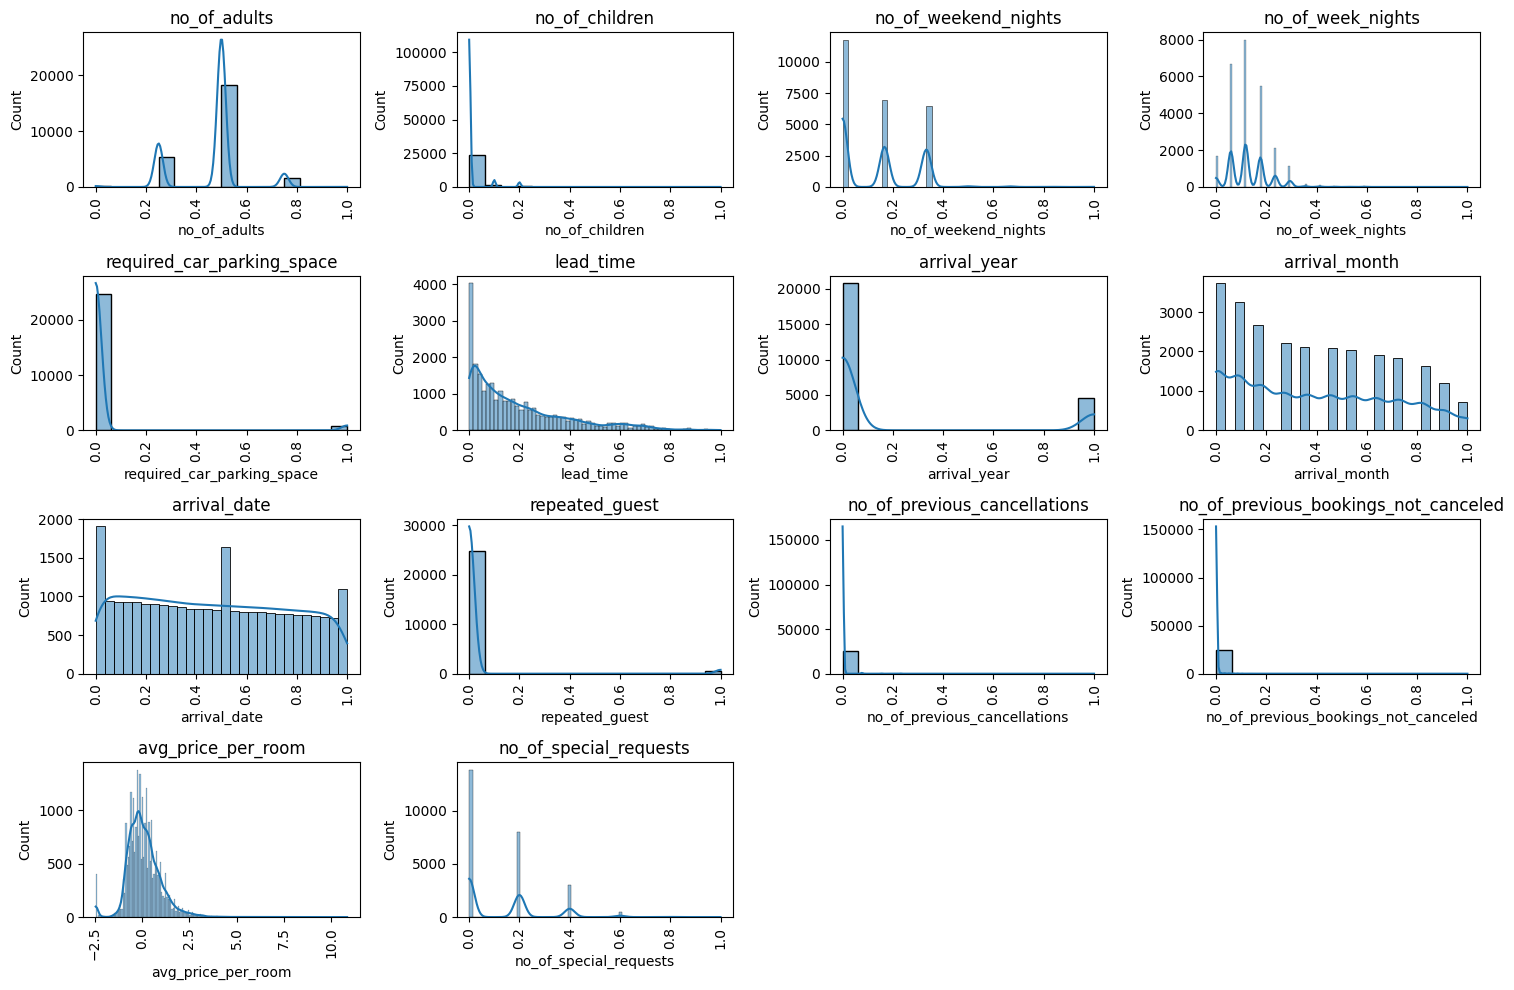

In [ ]:
# visulaize the distributions after scaling
visualize_hist_plots(X_train[num_columns])

**Observations**:

The shape of the features retained after scaling.

## Model building

### Model Criteria
Not_Cancelled => 0
Cancelled => 1

The problem is of classification type and therefore the following alogarithms are explored

* Logistic Regression
* Naive Bayes
* K Nearest Neighbors
* Support Vector Machines


Model can make wrong predictions as below

*  predicted as not cancelled but cancelled : False Negatives (FN)
*  predicted as cancelled but not cancelled : False Positivies (FP)

To minimize losses for Hotels INN, it is crucial to accurately predict cancellations. False negatives (FNs) can lead to significant financial losses, while false positives (FPs) may cause resource allocation issues but do not result in substantial losses.

Therefore, the model will be  tuned to reduce FNs, effectively **prioritizing a higher recall rate**.

### User defined functions

#### model_performance_classification_sklearn

In [ ]:
# function to compute model performance metrics
def model_performance_classification_sklearn(model, predictors, y_true, threshold=None):
  if threshold is None:
    y_pred = model.predict(predictors)
  else:
    # get probabilities and compare with threshold
    y_pred_temp = (model.predict_proba(predictors))[:,1] > threshold
    y_pred = np.round(y_pred_temp)

  acc = accuracy_score(y_true , y_pred)
  recall = recall_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  # create a dataframe for metrics
  df_metrics = pd.DataFrame({"Accuracy": acc,
         "Recall": recall,
         "Precision": precision,
         "F1": f1,},
        index=[0],)
  return df_metrics

#### confusion_matrix_sklearn

In [ ]:
# function to plot confusion matrix
def confusion_matrix_sklearn(model, predictors, y_true, threshold=None):
  if threshold is None:
    y_pred = model.predict(predictors)
  else:
    # get probabilities and compare with threshold
    y_pred_temp = (model.predict_proba(predictors))[:,1] > threshold
    y_pred = np.round(y_pred_temp)

  cm = confusion_matrix(y_true, y_pred)

  # lets compute percentages
  labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

  plt.figure(figsize=(6,4))
  sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
  plt.title(f'Confusion Matrix: {str(model)}', fontsize=10)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

### Logistic Regression

#### Logistic Regression - Threshold 0.5

In [ ]:
# Fit the model on training data set
model_lr = LogisticRegression(solver='newton-cg', random_state=1)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

##### Confusion Matrix : Logistic Regression - Threshold=0.5 - Training data

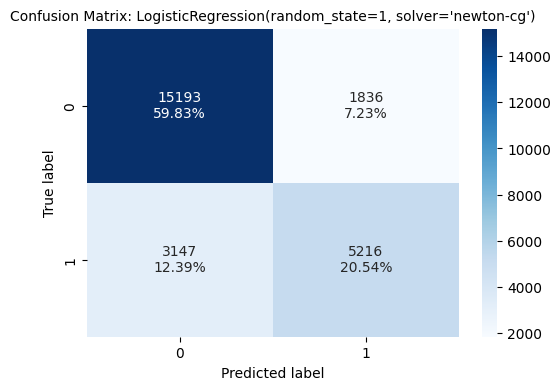

In [ ]:
# lets see the confusion matrix with threshold 0.5 for train data
confusion_matrix_sklearn(model_lr, X_train, y_train, threshold = 0.5)

**Observations**:

The False Negatives are predicted higher in training data

##### Metrics : Logistic Regression - Threshold=0.5 - Training data

In [ ]:
# check the model performance with threshold = 0.5 for train data
model_performance_classification_sklearn(model_lr, X_train, y_train, threshold = 0.5)

Accuracy  Recall  Precision   F1
0      0.80    0.62       0.74 0.68

##### Confusion Matrix : Logistic Regression - Threshold=0.5 - Test data

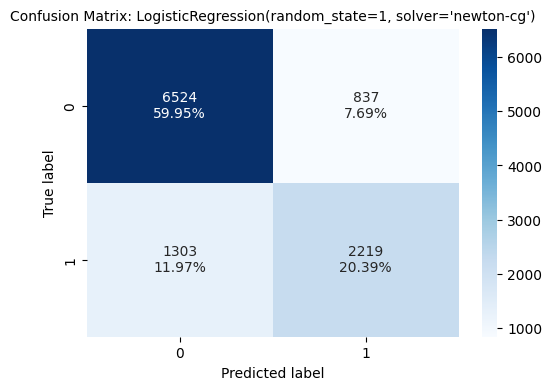

In [ ]:
# lets see the confusion matrix with threshold 0.5 for test data
confusion_matrix_sklearn(model_lr, X_test, y_test, threshold = 0.5)

##### Metrics : Logistic Regression - Threshold=0.5 - Test data

In [ ]:
# check the model performance with threshold = 0.5 for test data
model_performance_classification_sklearn(model_lr, X_test, y_test, threshold = 0.5)

Accuracy  Recall  Precision   F1
0      0.80    0.63       0.73 0.67

##### Metrics : Logistic Regression - Threshold=0.5 - Train vs Test data

In [ ]:
# Lets analyze the train and test data metrics together
train_test_comp_dot5 = pd.concat( [model_performance_classification_sklearn(model_lr, X_train, y_train, threshold = 0.5),
                                model_performance_classification_sklearn(model_lr, X_test, y_test, threshold = 0.5)], axis=0)
train_test_comp_dot5.index=['Train', 'Test']
train_test_comp_dot5.T

Train  Test
Accuracy    0.80  0.80
Recall      0.62  0.63
Precision   0.74  0.73
F1          0.68  0.67

**Observations**:

* The recall and F1 scores are relatively low.
* The recall score is marginally lower in the training data.
* The precision has slightly reduced in the test data.
* The F1 score shows a slight decrease in the test data.
* The consistency of the metrics suggests that the model for the default threshold is not overfitted.

#### Logistic Regression - Tuning

Lets improve the recall rate by optimizing the threshold using

* ROC curve
* Precision Recall curve

##### Logistic Regression Tuning - ROC curve

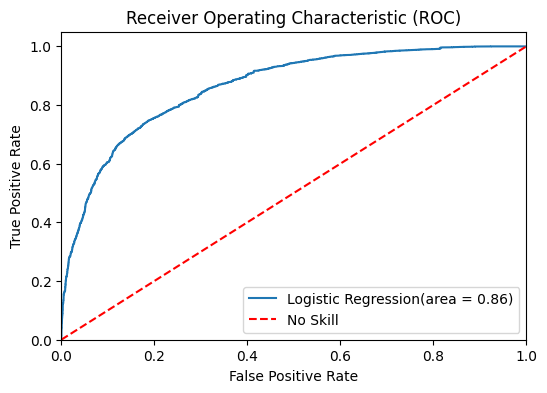

In [ ]:
# lets fine tune using ROC curve
def model_tune_roc(model, predictors, y_true, label='Logistic Regression'):
  logit_roc_auc = roc_auc_score(y_train, model.predict_proba(predictors)[:,1])
  fpr, tpr, thresholds = roc_curve(y_true, model.predict_proba(predictors)[:,1])
  plt.figure(figsize=(6,4))
  plt.plot(fpr, tpr, label=label + '(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--',label='No Skill')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()
  return fpr, tpr, thresholds

fpr, tpr, thresholds = model_tune_roc(model_lr, X_train, y_train)

In [ ]:
# get optimal index where TPR is high and FPR is minimum
optimal_idx = np.argmax(tpr-fpr)

# get optimal threshold using optimal index
optimal_threshold_roc = thresholds[optimal_idx]
optimal_threshold_roc

0.35668281308338173

##### Confusion Matrix : Logistic Regression - Threshold=Optimal ROC - Train data

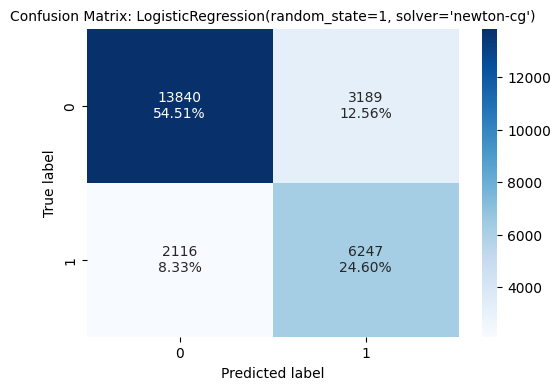

In [ ]:
# lets see the confusion matrix with optimum roc threshold
confusion_matrix_sklearn(model_lr, X_train, y_train, threshold = optimal_threshold_roc)

**Observations**:

Using optimal ROC threshold

* False Negatives reduced
* False Positives increased

##### Confusion Matrix : Logistic Regression - Optimal ROC - Train data

In [ ]:
# check the model performance with ROC optimal threshold for train data
model_performance_classification_sklearn(model_lr, X_train, y_train, threshold = optimal_threshold_roc)

Accuracy  Recall  Precision   F1
0      0.79    0.75       0.66 0.70

##### Metrics : Logistic Regression - Threshold=Optimal ROC - Train vs Test data

In [ ]:
# Lets analyze the train and test data metrics together
train_test_comp_roc = pd.concat( [model_performance_classification_sklearn(model_lr, X_train, y_train, threshold = optimal_threshold_roc),
                                model_performance_classification_sklearn(model_lr, X_test, y_test, threshold = optimal_threshold_roc)], axis=0)
train_test_comp_roc.index=['Train', 'Test']
train_test_comp_roc.T

Train  Test
Accuracy    0.79  0.79
Recall      0.75  0.76
Precision   0.66  0.65
F1          0.70  0.70

**Observations**:

* Recall and F1 metrics have improved with the optimal ROC threshold.
* The precision rate has decreased with the optimal ROC threshold.
* The consistency of metrics between training and testing data indicates that the model is not overfitting.

##### Logistic Regression Tuning - Precision Recall curve

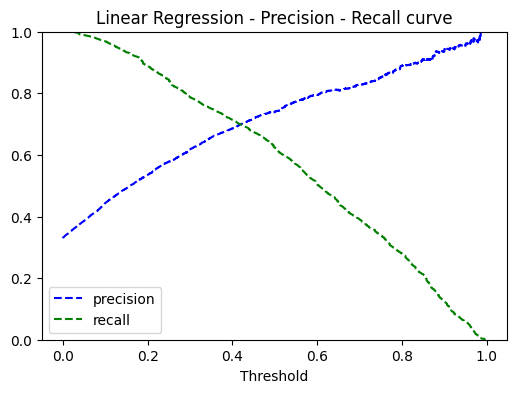

In [ ]:
# Analyze using precision and recall
def model_tune_precision_recall(model, predictors, y_true, title='Linear Regression'):
  y_scores = model.predict_proba(predictors)[:, 1]
  prec, rec, thres = precision_recall_curve(y_true, y_scores,)
  plt.figure(figsize=(6, 4))
  plt.plot(thres, prec[:-1], "b--", label="precision")
  plt.plot(thres, rec[:-1], "g--", label="recall")
  plt.xlabel("Threshold")
  plt.title(f"{title} - Precision - Recall curve")
  plt.legend(loc="lower left")
  plt.ylim([0, 1])
  plt.show()
  return prec, rec, thres

prec, rec, thres = model_tune_precision_recall(model_lr, X_train, y_train)

In [ ]:
# find optimal threshold where f1_score is best
f1_score_lr = 2 * (prec * rec) / (prec + rec + 1e-8)  # Avoid division by zero
idx = np.argmax(f1_score_lr)
optimal_threshold_prec_rec = thres[idx]
optimal_threshold_prec_rec

0.3568288466685029

##### Confusion Matrix : Logistic Regression - Optimal Precision_Recall - Train data

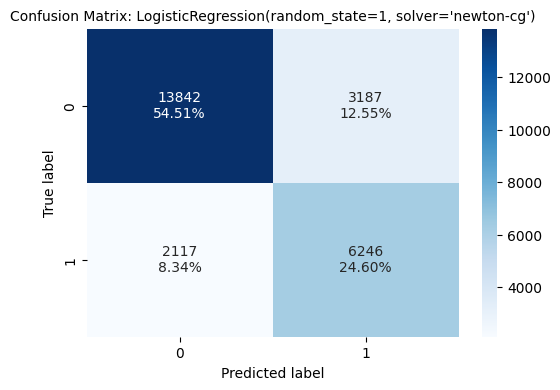

In [ ]:
# compute the confusion matrix on train data
confusion_matrix_sklearn(model_lr, X_train, y_train, threshold=optimal_threshold_prec_rec)

##### Metrics : Logistic Regression - Optimal Precision_Recall - Train data

In [ ]:
# compute the performance metrics using precision - recall optimized threshold
model_performance_classification_sklearn(model_lr, X_train, y_train, threshold=optimal_threshold_prec_rec)

Accuracy  Recall  Precision   F1
0      0.79    0.75       0.66 0.70

##### Confusion Matrix : Logistic Regression - Optimal Precision_Recall - Test data

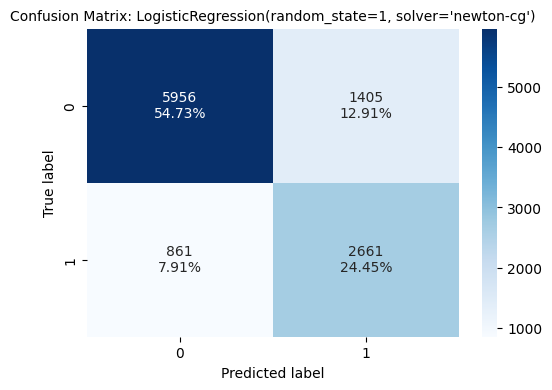

In [ ]:
# analyze confusion matrix using train data for optimized threshold
confusion_matrix_sklearn(model_lr, X_test, y_test, threshold=optimal_threshold_prec_rec)

##### Metrics : Logistic Regression - Optimal Precision_Recall - Train data

In [ ]:
# check the model performance with precision - recall optimal threshold for test data
model_performance_classification_sklearn(model_lr, X_test, y_test, threshold = optimal_threshold_prec_rec)

Accuracy  Recall  Precision   F1
0      0.79    0.76       0.65 0.70

In [ ]:
# Analyze the train and test metrics for precision - recall optimal threshold
train_test_comp_pre_recall = pd.concat([model_performance_classification_sklearn(model_lr, X_train, y_train, threshold = optimal_threshold_prec_rec),
          model_performance_classification_sklearn(model_lr, X_test, y_test, threshold = optimal_threshold_prec_rec)],
          axis=0)
train_test_comp_pre_recall.index = ['Train','Test']
train_test_comp_pre_recall.T

Train  Test
Accuracy    0.79  0.79
Recall      0.75  0.76
Precision   0.66  0.65
F1          0.70  0.70

**Observations**:

* The fine tuning using ROC and Recall-Precision curves resulted the same threshold.

* The recall rate has not improved compared to the ROC threshold but remains better than the default threshold of 0.5.

* The metrics are consistent between the training and testing data, indicating that the model does not suffer from overfitting.

##### Logistic Regression - Optimized model

In [ ]:
# lets print the thresholds in a data frame
lr_thresholds = pd.DataFrame({'Logistic-Regression-Thresholds': [0.5, optimal_threshold_roc, optimal_threshold_prec_rec ] })
lr_thresholds.index = ['Default','ROC optimized','Prescison-Recall']
lr_thresholds

Logistic-Regression-Thresholds
Default                                     0.50
ROC optimized                               0.36
Prescison-Recall                            0.36

In [ ]:
# Lets compare all the variants of Logistic Regression for train data
df_comp_models_lrtrain = pd.concat([
    model_performance_classification_sklearn(model_lr, X_train, y_train, threshold= 0.5),
    model_performance_classification_sklearn(model_lr, X_train, y_train, threshold= optimal_threshold_roc),
    model_performance_classification_sklearn(model_lr, X_train, y_train, threshold= optimal_threshold_prec_rec),
], axis=0
)
df_comp_models_lrtrain.index=['Logistic-Regression-0.5','Logistic-Regression-ROC', 'Logistic-Regression-Precision-Recall']
df_comp_models_lrtrain.T

Logistic-Regression-0.5  Logistic-Regression-ROC  \
Accuracy                      0.80                     0.79   
Recall                        0.62                     0.75   
Precision                     0.74                     0.66   
F1                            0.68                     0.70   

           Logistic-Regression-Precision-Recall  
Accuracy                                   0.79  
Recall                                     0.75  
Precision                                  0.66  
F1                                         0.70

In [ ]:
# Lets compare all the variants of Logistic Regression for test data
df_comp_models_lrtrain = pd.concat([
    model_performance_classification_sklearn(model_lr, X_test, y_test, threshold= 0.5),
    model_performance_classification_sklearn(model_lr, X_test, y_test, threshold= optimal_threshold_roc),
    model_performance_classification_sklearn(model_lr, X_test, y_test, threshold= optimal_threshold_prec_rec),
], axis=0
)
df_comp_models_lrtrain.index=['Logistic-Regression-0.5','Logistic-Regression-ROC', 'Logistic-Regression-Precision-Recall']
df_comp_models_lrtrain.T

Logistic-Regression-0.5  Logistic-Regression-ROC  \
Accuracy                      0.80                     0.79   
Recall                        0.63                     0.76   
Precision                     0.73                     0.65   
F1                            0.67                     0.70   

           Logistic-Regression-Precision-Recall  
Accuracy                                   0.79  
Recall                                     0.76  
Precision                                  0.65  
F1                                         0.70

**Observations**:

* These models produce consistent results between the training and testing data, indicating that they are not overfitting.

* Logistic Regression with the default threshold of 0.50 provides better precision and accuracy.

* Logistic Regression with a threshold optimized for the ROC curve, achieves better recall and F1 scores. Same is the case for Precision-Recall curve optimization.

Among all the thresholds evaluated for Logistic Regression, the ROC-optimized threshold delivers the good recall rate. Since the objective is to improve recall, **Logistic Regression with a threshold of 0.36 is the preferred choice** among all the thresholds explored.

### Naive Bayes

#### Naive Bayes - Threshold 0.5

In [ ]:
# Train the model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

#### Confusion Matrix : Naive Bayes - Threshold 0.5 - Train data

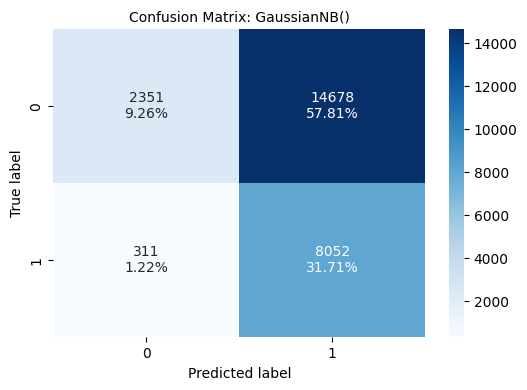

In [ ]:
# compute the confusion matrix on train data
confusion_matrix_sklearn(model_nb, X_train, y_train, threshold=0.5)

**Observations**:
* False Negatives reduced
* False positives increased
* True Positives and True Negatives degraded

#### Metrics : Naive Bayes - Threshold 0.5 - Train data

In [ ]:
# check the performance metrics
model_performance_classification_sklearn(model_nb, X_train, y_train, threshold=0.5)

Accuracy  Recall  Precision   F1
0      0.41    0.96       0.35 0.52

#### Confusion Matrix : Naive Bayes - Threshold 0.5 - Test data

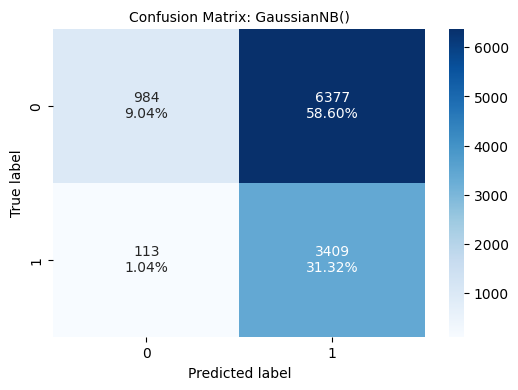

In [ ]:
# compute the confusion matrix on test data
confusion_matrix_sklearn(model_nb, X_test, y_test, threshold= 0.5)

#### Metrics : Naive Bayes - Threshold 0.5 - Test data

In [ ]:
# check the model performance on test data
model_performance_classification_sklearn(model_nb, X_test, y_test, threshold=0.5)

Accuracy  Recall  Precision   F1
0      0.40    0.97       0.35 0.51

#### Metrics : Naive Bayes - Threshold 0.5 - Train vs Test data

In [ ]:
# Analyze the train and test metrics for NB Gausian - 0.5 threshold
train_test_nb_dot5 = pd.concat([model_performance_classification_sklearn(model_nb, X_train, y_train, threshold = 0.5),
          model_performance_classification_sklearn(model_nb, X_test, y_test, threshold = 0.5)],
          axis=0)
train_test_nb_dot5.index = ['Train','Test']
train_test_nb_dot5.T

Train  Test
Accuracy    0.41  0.40
Recall      0.96  0.97
Precision   0.35  0.35
F1          0.52  0.51

**Observations**:

* The performance of model is consistent between test and train data

* The recall rate is very good

* The precision, accuracy and F1 metrics are very poor

#### Naive Bayes - ROC optimized Threshold

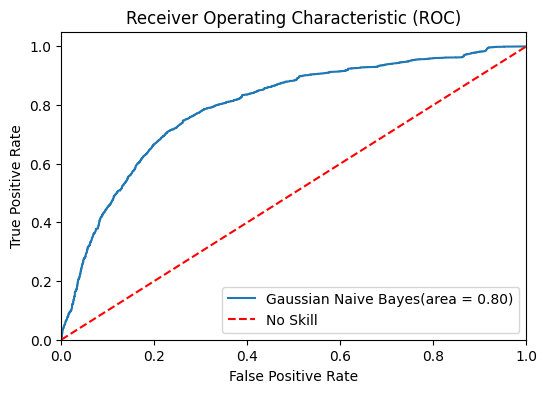

In [ ]:
# lets optimize the threshold using ROC curve
fpr_nb, tpr_nb, thresholds_nb = model_tune_roc(model_nb, X_train, y_train, label='Gaussian Naive Bayes')

In [ ]:
# get optimal index where TPR is high and FPR is minimum
optimal_idx_nb = np.argmax(tpr_nb-fpr_nb)
optimal_threshold_roc_nb = thresholds_nb[optimal_idx_nb]
optimal_threshold_roc_nb

0.9999996231382653

#### Confusion Matrix : Naive Bayes - ROC optimized Threshold  - Train data

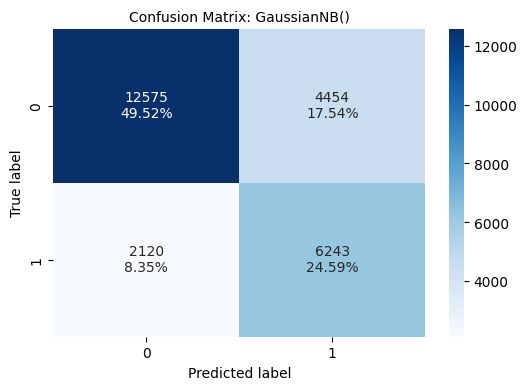

In [ ]:
# compute confusion matrix on train data
confusion_matrix_sklearn(model_nb, X_train, y_train, threshold = optimal_threshold_roc_nb)

#### Metrics : Naive Bayes - ROC optimized Threshold  - Train data

In [ ]:
# check the performance on the train data
model_performance_classification_sklearn(model_nb, X_train, y_train, threshold = optimal_threshold_roc_nb)

Accuracy  Recall  Precision   F1
0      0.74    0.75       0.58 0.66

#### Confusion Matrix : Naive Bayes - ROC optimized Threshold  - Test data

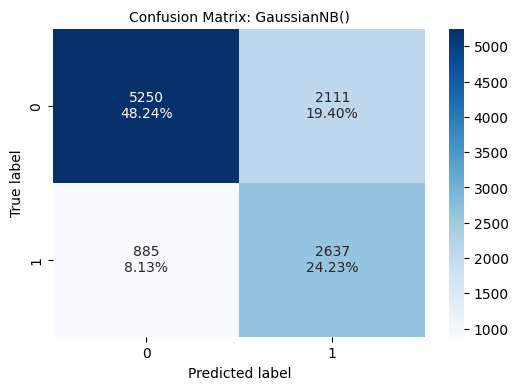

In [ ]:
# compute confusion matrix on test data
confusion_matrix_sklearn(model_nb, X_test, y_test, threshold = optimal_threshold_roc_nb)

#### Metrics : Naive Bayes - ROC optimized Threshold  - Test data

In [ ]:
# check the performance on the test data
model_performance_classification_sklearn(model_nb, X_test, y_test, threshold = optimal_threshold_roc_nb)

Accuracy  Recall  Precision   F1
0      0.72    0.75       0.56 0.64

#### Metrics : Naive Bayes - ROC optimized Threshold  - Train vs Test data

In [ ]:
# Analyze the train and test metrics for NB Gausian - ROC optimized threshold
train_test_nb_roc = pd.concat([model_performance_classification_sklearn(model_nb, X_train, y_train, threshold = optimal_threshold_roc_nb),
          model_performance_classification_sklearn(model_nb, X_test, y_test, threshold = optimal_threshold_roc_nb)],
          axis=0)
train_test_nb_roc.index = ['Train','Test']
train_test_nb_roc.T

Train  Test
Accuracy    0.74  0.72
Recall      0.75  0.75
Precision   0.58  0.56
F1          0.66  0.64

**Observations**:

* The performance of model is consistent between test and train data

* The recall rate is dropped comapred to 0.5 threshold

* The precision, accuracy and F1 metrics are improved compared to 0.5 threshold

#### Naive Bayes - precision - recall optimization

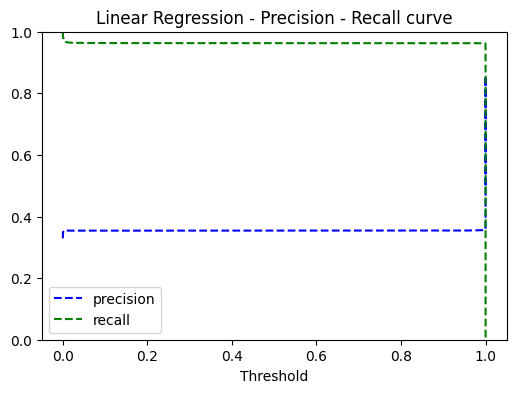

In [ ]:
# optimize the threshold using ROC
prec_nb, rec_nb, thres_nb = model_tune_precision_recall(model_nb, X_train, y_train)

In [ ]:
# find optimal threshold where f1_score is best
f1_score_nb = 2 * (prec_nb * rec_nb) / (prec_nb + rec_nb + 1e-8)  # Avoid division by zero
idx_nb = np.argmax(f1_score_nb)
optimal_threshold_prec_rec_nb = thres_nb[idx_nb]
optimal_threshold_prec_rec_nb

0.9999996231382653

#### Confusion Matrix : Naive Bayes - Precison-Recall optimized Threshold  - Train data

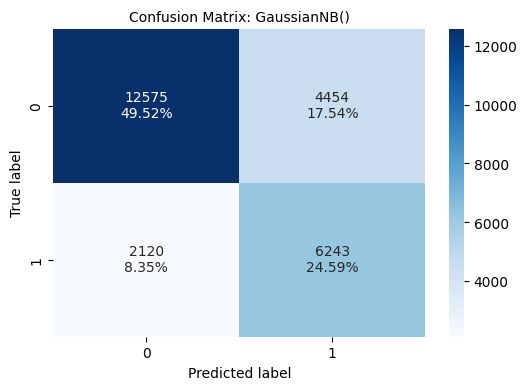

In [ ]:
# compute confusion matrix for train data
confusion_matrix_sklearn(model_nb, X_train, y_train, threshold = optimal_threshold_prec_rec_nb)

**Observations**:

The optimized thrshold is same as ROC curve

The False Negatives and Positives are same as ROC optimized threshold

#### Metrics : Naive Bayes - Precison-Recall optimized Threshold  - Train data

In [ ]:
# calculate performance metrics
model_performance_classification_sklearn(model_nb, X_train, y_train, threshold = optimal_threshold_prec_rec_nb)

Accuracy  Recall  Precision   F1
0      0.74    0.75       0.58 0.66

#### Confusion Matrix : Naive Bayes - Precison-Recall optimized Threshold  - Test data

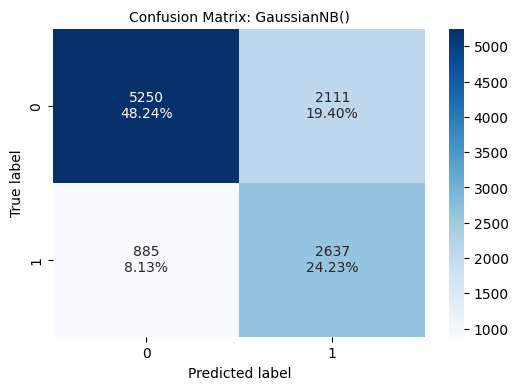

In [ ]:
# compute confusion matrix for test data
confusion_matrix_sklearn(model_nb, X_test, y_test, threshold = optimal_threshold_prec_rec_nb)

#### Metrics : Naive Bayes - Precison-Recall optimized Threshold  - Test data

In [ ]:
# calculate performance metrics
model_performance_classification_sklearn(model_nb, X_test, y_test, threshold = optimal_threshold_prec_rec_nb)

Accuracy  Recall  Precision   F1
0      0.72    0.75       0.56 0.64

#### Metrics : Naive Bayes - Precison-Recall optimized Threshold  - Train vs Test data

In [ ]:
# Analyze the train and test metrics for NB Gausian - Precision - Recall optimized threshold
train_test_nb_pr = pd.concat([model_performance_classification_sklearn(model_nb, X_train, y_train, threshold = optimal_threshold_prec_rec_nb),
          model_performance_classification_sklearn(model_nb, X_test, y_test, threshold = optimal_threshold_prec_rec_nb)],
          axis=0)
train_test_nb_pr.index = ['Train','Test']
train_test_nb_pr.T

Train  Test
Accuracy    0.74  0.72
Recall      0.75  0.75
Precision   0.58  0.56
F1          0.66  0.64

**Observations**:

* The performance of model is consistent between test and train data

* The optimized threshold is same as ROC curve.

* The recall rate is dropped comapred to 0.5 threshold

* The precision, accuracy and F1 metrics are improved compared to 0.5 threshold

#### Naive Bayes - Optimized model

In [ ]:
# lets print the thresholds in a data frame
print(f"Naive-Bayes-ROC-Threshold: {optimal_threshold_roc_nb}")
print(f"Naive-Bayes-Precison-Recall-Threshold: {optimal_threshold_prec_rec_nb}")

Naive-Bayes-ROC-Threshold: 0.9999996231382653
Naive-Bayes-Precison-Recall-Threshold: 0.9999996231382653


In [ ]:
# Lets compare all the variants of Naive Bayes for train data
df_comp_models_nbtrain = pd.concat([
    model_performance_classification_sklearn(model_nb, X_train, y_train, threshold= 0.5),
    model_performance_classification_sklearn(model_nb, X_train, y_train, threshold= optimal_threshold_roc_nb),
    model_performance_classification_sklearn(model_nb, X_train, y_train, threshold= optimal_threshold_prec_rec_nb),
], axis=0
)
df_comp_models_nbtrain.index=['Naive-Bayes-0.5','Naive-Bayes-ROC', 'Naive-Bayes-Precision-Recall']
df_comp_models_nbtrain.T

Naive-Bayes-0.5  Naive-Bayes-ROC  Naive-Bayes-Precision-Recall
Accuracy              0.41             0.74                          0.74
Recall                0.96             0.75                          0.75
Precision             0.35             0.58                          0.58
F1                    0.52             0.66                          0.66

In [ ]:
# Lets compare all the variants of Naive Bayes for test data
df_comp_models_nbtrain = pd.concat([
    model_performance_classification_sklearn(model_nb, X_test, y_test, threshold= 0.5),
    model_performance_classification_sklearn(model_nb, X_test, y_test, threshold= optimal_threshold_roc_nb),
    model_performance_classification_sklearn(model_nb, X_test, y_test, threshold= optimal_threshold_prec_rec_nb),
], axis=0
)
df_comp_models_nbtrain.index=['Naive-Bayes-0.5','Naive-Bayes-ROC', 'Naive-Bayes-Precision-Recall']
df_comp_models_nbtrain.T

Naive-Bayes-0.5  Naive-Bayes-ROC  Naive-Bayes-Precision-Recall
Accuracy              0.40             0.72                          0.72
Recall                0.97             0.75                          0.75
Precision             0.35             0.56                          0.56
F1                    0.51             0.64                          0.64

**Observations**:

* These models produce consistent results between the training and testing data, indicating that they are not overfitting.

* Gaussian Naive Bayes with the default threshold of 0.50, delivers a very high recall rate.However, it suffers from poor precision and suboptimal performance on other metrics, which makes it less favorable overall.

* Gaussian Naive Bayes with ROC optimized threshold, achieves improved precision and F1 score compared to the default threshold.
However, this improvement comes at the cost of a reduced recall rate.

* Gaussian Naive Bayes with Precision-Recall optimized threshold, achieves comparable to ROC threshold.

While the default threshold (0.50) achieves an exceptionally high recall rate, its poor precision results in a significant number of false positives. This could lead to resource inefficiencies and higher associated costs. Therefore, the **ROC-optimized threshold emerges as the preferred choice** in Naive Bayes alogarithm

### K-Nearest Neigbour

#### K=5

In [ ]:
# lets train the model using K=5
model_k5 = KNeighborsClassifier(n_neighbors = 5)
model_k5.fit(X_train, y_train)

KNeighborsClassifier()

#### Confusion Matrix : KNN-5 - Train data

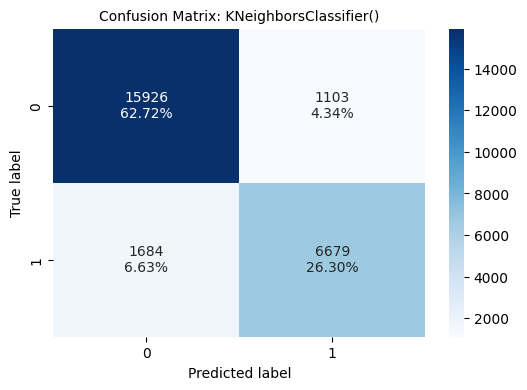

In [ ]:
# compute confusion matrix for training data
confusion_matrix_sklearn(model_k5, X_train, y_train)

#### Metrics : KNN-5 - Train data

In [ ]:
# calcuate the performance metrics for train data
model_performance_classification_sklearn(model_k5, X_train, y_train)

Accuracy  Recall  Precision   F1
0      0.89    0.80       0.86 0.83

#### Confusion Matrix : KNN-5 - Test data

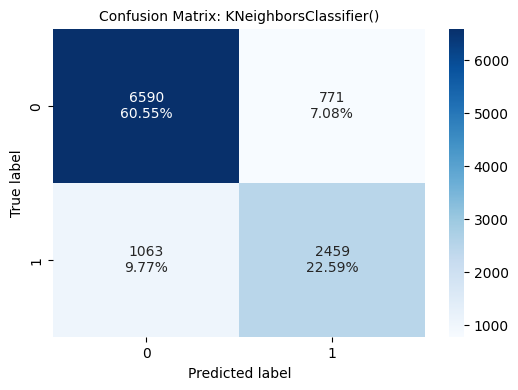

In [ ]:
# compute confusion matrix for test data
confusion_matrix_sklearn(model_k5, X_test, y_test)

#### Metrics : KNN-5 - Test data

In [ ]:
# calcuate the performance metrics for test data
model_performance_classification_sklearn(model_k5, X_test, y_test)

Accuracy  Recall  Precision   F1
0      0.83    0.70       0.76 0.73

#### Metrics : KNN-5 - Train vs Test data

In [ ]:
# Analyze the train and test metrics for NB Gausian - Precision - Recall optimized threshold
train_test_knn5 = pd.concat([model_performance_classification_sklearn(model_k5, X_train, y_train),
          model_performance_classification_sklearn(model_k5, X_test, y_test)],
          axis=0)
train_test_knn5.index = ['Train','Test']
train_test_knn5.T

Train  Test
Accuracy    0.89  0.83
Recall      0.80  0.70
Precision   0.86  0.76
F1          0.83  0.73

**Observations**:

* All metrics perform well for the training data.
* The metrics are inconsistent across the test data, indicating that the model is overfitted at k=5

#### Tune K-Value

In [ ]:
# Tune the K-Value
# use odd values to avoid the conflict in voting

# empty list that will hold recall scores
recall_scores_train = []
recall_scores_test = []
model_k_dict = {}

neighbors = [k for k in range(3,39,2)]

# compute recall values for train and test data using different K values
for k in neighbors:
  model_k = KNeighborsClassifier(n_neighbors = k)
  model_k.fit(X_train, y_train)
  model_k_dict[k] = model_k

  y_predict_train = model_k.predict(X_train)
  recall_scores_train.append(recall_score(y_train,y_predict_train))

  y_predict_test = model_k.predict(X_test)
  recall_scores_test.append(recall_score(y_test,y_predict_test))

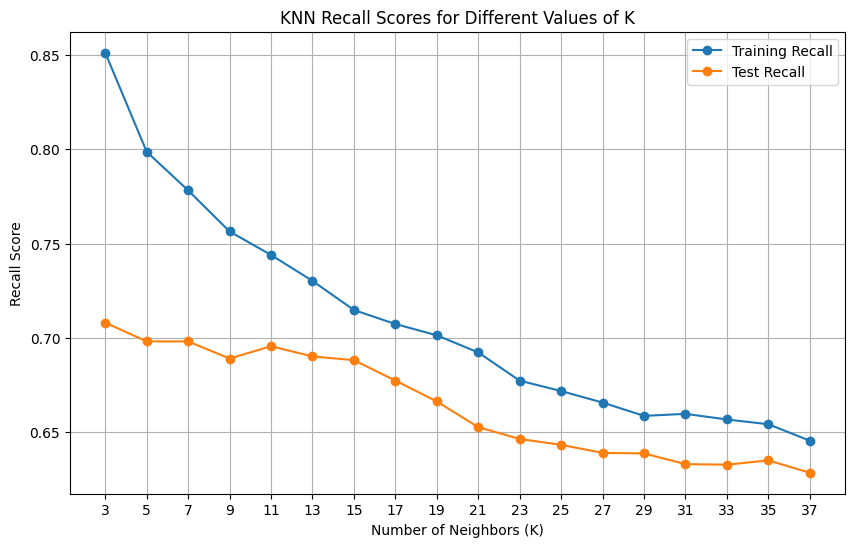

In [ ]:
# Plot recall scores for training and test sets
plt.figure(figsize=(10, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Lets compare for different neigbors of KNN on train data
df_comp_models_knntrain = pd.concat([
    model_performance_classification_sklearn(model_k_dict[3], X_train, y_train),
    model_performance_classification_sklearn(model_k_dict[5], X_train, y_train),
    model_performance_classification_sklearn(model_k_dict[7], X_train, y_train),
    model_performance_classification_sklearn(model_k_dict[9], X_train, y_train),
    model_performance_classification_sklearn(model_k_dict[11], X_train, y_train),
], axis=0
)
df_comp_models_knntrain.index=['KNN-3','KNN-5', 'KNN-7','KNN-9','KNN-11']
df_comp_models_knntrain.T

KNN-3  KNN-5  KNN-7  KNN-9  KNN-11
Accuracy    0.92   0.89   0.88   0.87    0.87
Recall      0.85   0.80   0.78   0.76    0.74
Precision   0.89   0.86   0.84   0.84    0.83
F1          0.87   0.83   0.81   0.79    0.78

In [ ]:
# Lets compare for different neigbors of KNN on test data
df_comp_models_knntest = pd.concat([
    model_performance_classification_sklearn(model_k_dict[3], X_test, y_test),
    model_performance_classification_sklearn(model_k_dict[5], X_test, y_test),
    model_performance_classification_sklearn(model_k_dict[7], X_test, y_test),
    model_performance_classification_sklearn(model_k_dict[9], X_test, y_test),
    model_performance_classification_sklearn(model_k_dict[11], X_test, y_test),
], axis=0
)
df_comp_models_knntest.index=['KNN-3','KNN-5', 'KNN-7','KNN-9','KNN-11']
df_comp_models_knntest.T

KNN-3  KNN-5  KNN-7  KNN-9  KNN-11
Accuracy    0.83   0.83   0.83   0.83    0.84
Recall      0.71   0.70   0.70   0.69    0.70
Precision   0.75   0.76   0.77   0.77    0.77
F1          0.73   0.73   0.73   0.73    0.73

**Observations**:

* The recall scores for both the training and test sets are highest when k=3

* As k increases beyond 3, the recall scores gradually decline for both training and test sets.

* The difference between the recall rates of train and test data sets at k=3 is high ( > 0.08%) indicating that the model is overfitting at K=3

Based on the recall scores, **k=7 seems to be the optimal choice**, striking a balance between effectively identifying positive instances and maintaining good generalization to unseen data.

### Support Vector Machines

#### SVM - linear

In [ ]:
# Train the linear model
svm_l = SVC(kernel='linear')
svm_l.fit(X_train, y_train)

SVC(kernel='linear')

##### Confusion Matrix : SVM Linear - Train data

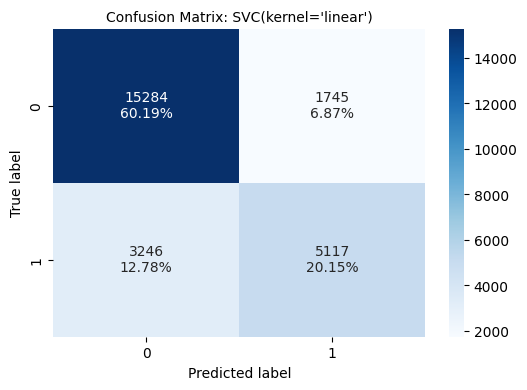

In [ ]:
# compute confusion matrix for train data
confusion_matrix_sklearn(svm_l, X_train, y_train)

##### Metrics : SVM Linear - Train data

In [ ]:
# calculate performance metrics for train data
model_performance_classification_sklearn(svm_l, X_train, y_train)

Accuracy  Recall  Precision   F1
0      0.80    0.61       0.75 0.67

##### Confusion Matrix : SVM Linear - Test data

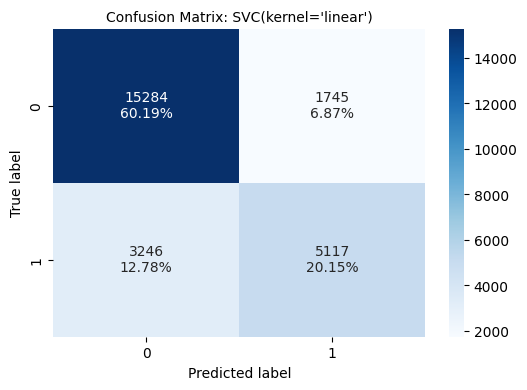

In [ ]:
# compute confusion matrix for test data
confusion_matrix_sklearn(svm_l, X_train, y_train)

##### Metrics : SVM Linear - Test data

In [ ]:
# calculate performance metrics for test data
model_performance_classification_sklearn(svm_l, X_test, y_test)

Accuracy  Recall  Precision   F1
0      0.80    0.63       0.73 0.68

**Observations**:

* The SVM with a linear kernel is producing a low recall rate.
* The metrics for the SVM linear model are consistent between the training and testing data, suggesting that the model is not overfitted.

#### SVM Polynomial - Degree 2

In [ ]:
# Train the model with polynomial kernel with degree 2
svm_pd2 = SVC(kernel='poly', degree=2)
svm_pd2.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

##### Confusion Matrix : SVM Polynomial - Degree 2 - Train data

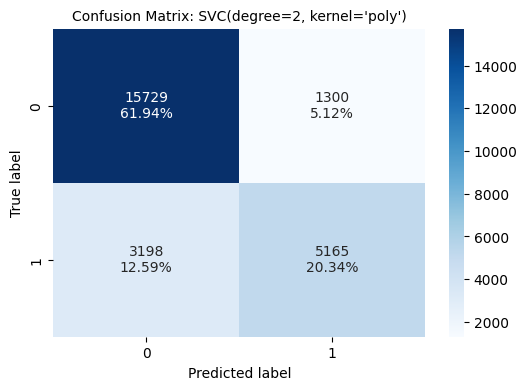

In [ ]:
# confusion matrix for train data
confusion_matrix_sklearn(svm_pd2, X_train, y_train)

##### Metrics : SVM Polynomial - Degree 2 - Train data

In [ ]:
# compute metrics for poly degree 2
model_performance_classification_sklearn(svm_pd2, X_train, y_train)

Accuracy  Recall  Precision   F1
0      0.82    0.62       0.80 0.70

##### Confusion Matrix : SVM Polynomial - Degree 2 - Test data

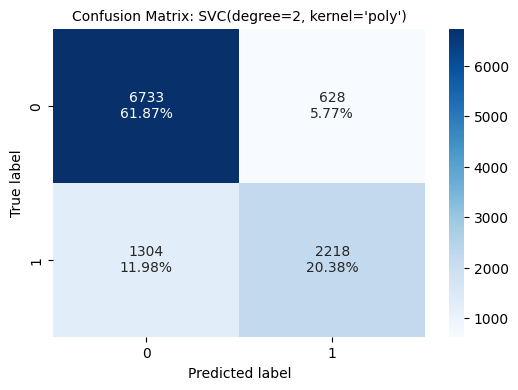

In [ ]:
# confusion matrix for test data
confusion_matrix_sklearn(svm_pd2, X_test, y_test)

##### Metrics : SVM Polynomial - Degree 2 - test data

In [ ]:
#compute metrics for test data
model_performance_classification_sklearn(svm_pd2, X_test, y_test)

Accuracy  Recall  Precision   F1
0      0.82    0.63       0.78 0.70

**Observations**:
* The recall rate is slightly comparable with linear for degree 2
* The metrics for polynomial kernel of degree 2 are consistent between train and test that implies the model is not overfitted

#### SVM Polynomial - Degree 3

In [ ]:
svm_pd3 = SVC(kernel='poly', degree=3)
svm_pd3.fit(X_train, y_train)

SVC(kernel='poly')

##### Confusion Matrix : SVM Polynomial - Degree 3 - Train data

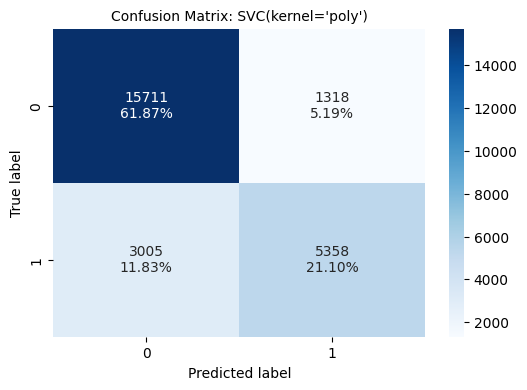

In [ ]:
# confusion matrix for train data
confusion_matrix_sklearn(svm_pd3, X_train, y_train)

##### Metrics : SVM Polynomial - Degree 3 - Train data

In [ ]:
# calcualte metrics for train data
model_performance_classification_sklearn(svm_pd3, X_train, y_train)

Accuracy  Recall  Precision   F1
0      0.83    0.64       0.80 0.71

##### Confusion Matrix : SVM Polynomial - Degree 3 - Test data

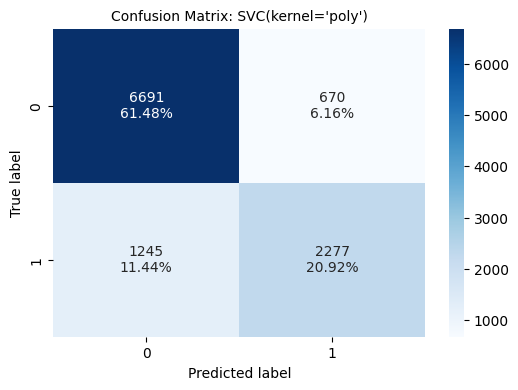

In [ ]:
# confusion matrix for test data
confusion_matrix_sklearn(svm_pd3, X_test, y_test)

##### Metrics : SVM Polynomial - Degree 3 - Test data

In [ ]:
# compute metrics for test data
model_performance_classification_sklearn(svm_pd3, X_test, y_test)

Accuracy  Recall  Precision   F1
0      0.82    0.65       0.77 0.70

**Observations**:

* The recall rate is slightly improved with polynomial of degree 3
* The metrics are consistent across train and test data that implies the model is not overfitted.

##### Polynomial Gamma and C values

In [ ]:
# get the Gamma value
gama_s = round(svm_pd3._gamma,4)
gama_s

0.344

In [ ]:
# Get the C  value
c_sval = svm_pd3.C
c_sval

1.0

#### SVM - Poly - finetune

Lets optimize the SVM model with various values of gamma, C and degrees for better recall rate


In [ ]:
def finetune_svm_poly(predictors, target):

  # initialize req variables
  best_score=0
  best_params={}

  gama_values = [gama_s/10, gama_s, gama_s*10]
  c_values = [c_sval,c_sval*10]
  degree_values = [2,3]
  model_svms = []
  model_svms_labels = []
  train_recalls = []

  for gama in gama_values:
    for c in c_values:
      for deg in degree_values:
        if( gama >= 1 and deg > 2 ):
          print(f"gamma={gama}, C={c}, degree={deg} => skip")
          continue
        start_time = time.time()
        model = SVC(kernel='poly',gamma=gama, C=c, degree=deg, random_state=1)
        # fit the model
        model.fit(predictors, target)
        model_svms.append(model)
        model_svms_labels.append(f"gamma={gama},C={c}")
        # compute predictions
        y_predict = model.predict(predictors)
        elapsed_time = time.time() - start_time
        re_score = recall_score(target,y_predict)
        train_recalls.append(re_score)
        print(f"gamma={gama}, C={c}, degree={deg}, processing_time={elapsed_time:.2f}s => recall_score={re_score}")
        if re_score > best_score:
              best_score = re_score
              best_params = {'degree': deg,
                             'gamma': gama,
                             'C': c,
                             'score' : re_score,
                             'processing_time' : f"{elapsed_time:.2f}s",
                             'model' : model}

  return best_score, best_params, model_svms, model_svms_labels, train_recalls

In [ ]:
# log the recall rates for different values of Gamma, C and degree and print the best params
rescore_poly, params_poly, model_svms_poly, model_svms_labels_poly, train_recalls_poly = finetune_svm_poly(X_train, y_train)
params_poly
#gamma=3, C=10, degree=3, processing_time=3703.79s => recall_score=0.756187970823867

gamma=0.0344, C=1.0, degree=2, processing_time=30.54s => recall_score=0.34198254214994617
gamma=0.0344, C=1.0, degree=3, processing_time=38.19s => recall_score=0.004304675355733588
gamma=0.0344, C=10.0, degree=2, processing_time=25.21s => recall_score=0.5735979911515007
gamma=0.0344, C=10.0, degree=3, processing_time=35.23s => recall_score=0.3079038622503886
gamma=0.344, C=1.0, degree=2, processing_time=22.04s => recall_score=0.6176013392323328
gamma=0.344, C=1.0, degree=3, processing_time=24.19s => recall_score=0.6406791821116824
gamma=0.344, C=10.0, degree=2, processing_time=36.56s => recall_score=0.6402008848499342
gamma=0.344, C=10.0, degree=3, processing_time=38.29s => recall_score=0.7009446370919526
gamma=3.4399999999999995, C=1.0, degree=2, processing_time=85.70s => recall_score=0.6484515126150903
gamma=3.4399999999999995, C=1.0, degree=3 => skip
gamma=3.4399999999999995, C=10.0, degree=2, processing_time=597.84s => recall_score=0.6483319382996532
gamma=3.4399999999999995, C=10.

{'degree': 3,
 'gamma': 0.344,
 'C': 10.0,
 'score': 0.7009446370919526,
 'processing_time': '38.29s',
 'model': SVC(C=10.0, gamma=0.344, kernel='poly', random_state=1)}

In [ ]:
# The better performing polynomial model
params_poly['model']

SVC(C=10.0, gamma=0.344, kernel='poly', random_state=1)

##### Confusion Matrix : SVM-Poly-Optimized on Train data

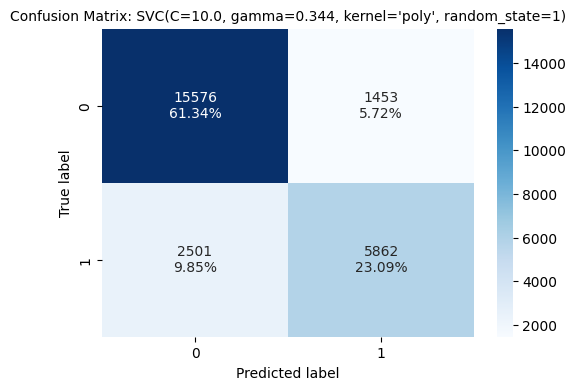

In [ ]:
#compute confusion matrix on train data
confusion_matrix_sklearn(params_poly['model'], X_train, y_train)

##### Metrics : SVM-Poly-Optimized on Train data

In [ ]:
# calculate metrics on train data
model_performance_classification_sklearn(params_poly['model'], X_train, y_train)

Accuracy  Recall  Precision   F1
0      0.84    0.70       0.80 0.75

##### Confusion Matrix : SVM-Poly-Optimized on Test data

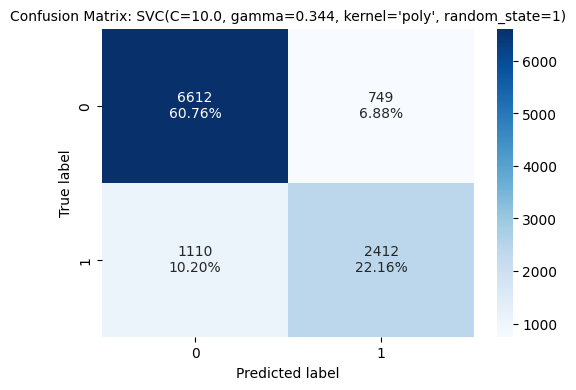

In [ ]:
#compute confusion matrix on train data
confusion_matrix_sklearn(params_poly['model'], X_test, y_test)

##### Metrics : SVM-Poly-Optimized on Test data

In [ ]:
# compute metrics on test data
model_performance_classification_sklearn(params_poly['model'], X_test, y_test)

Accuracy  Recall  Precision   F1
0      0.83    0.68       0.76 0.72

##### Metrics : SVM-Poly-models Train vs Test data

In [ ]:
# Lets compare for different SVM polynomials models
df_comp_models_poly_train = pd.concat([
    model_performance_classification_sklearn(svm_l, X_train, y_train),
    model_performance_classification_sklearn(svm_pd2, X_train, y_train),
    model_performance_classification_sklearn(svm_pd3, X_train, y_train),
    model_performance_classification_sklearn(params_poly['model'], X_train, y_train),
], axis=0
)
df_comp_models_poly_train.index=['Kernel-Linear','Kernel-Poly-Degree2', 'Kernel-Poly-Degree3','Kernel-Poly-Optimized']
df_comp_models_poly_train.T

Kernel-Linear  Kernel-Poly-Degree2  Kernel-Poly-Degree3  \
Accuracy            0.80                 0.82                 0.83   
Recall              0.61                 0.62                 0.64   
Precision           0.75                 0.80                 0.80   
F1                  0.67                 0.70                 0.71   

           Kernel-Poly-Optimized  
Accuracy                    0.84  
Recall                      0.70  
Precision                   0.80  
F1                          0.75

In [ ]:
# Lets compare for different polynomials models on test data
df_comp_models_poly_train = pd.concat([
    model_performance_classification_sklearn(svm_l, X_test, y_test),
    model_performance_classification_sklearn(svm_pd2, X_test, y_test),
    model_performance_classification_sklearn(svm_pd3, X_test, y_test),
    model_performance_classification_sklearn(params_poly['model'], X_test, y_test),
], axis=0
)
df_comp_models_poly_train.index=['Kernel-Linear','Kernel-Poly-Degree2', 'Kernel-Poly-Degree3','Kernel-Poly-Optimized']
df_comp_models_poly_train.T

Kernel-Linear  Kernel-Poly-Degree2  Kernel-Poly-Degree3  \
Accuracy            0.80                 0.82                 0.82   
Recall              0.63                 0.63                 0.65   
Precision           0.73                 0.78                 0.77   
F1                  0.68                 0.70                 0.70   

           Kernel-Poly-Optimized  
Accuracy                    0.83  
Recall                      0.68  
Precision                   0.76  
F1                          0.72

**Observations**:

* Optimized SVM Polynomial kernel is having the following hyper parameters
  - 'degree': 3,
  - 'gamma': 0.344,
  - 'C': 10.0,
  - 'Recall score': 0.7009446370919526,
  - 'processing_time': '46.84s

*Higher gamma values with higher degrees were skipped due to the excessive time required to fit the model (approximately 30 minutes).

*The model demonstrates a better recall rate compared to other SVM polynomial models analyzed.

* The metrics are consistent between train and test data that confirms that the model is not overfitted

#### SVM - RBF

In [ ]:
# Train the RBF model
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

##### Confusion Matrix : SVM-RBF on Train data

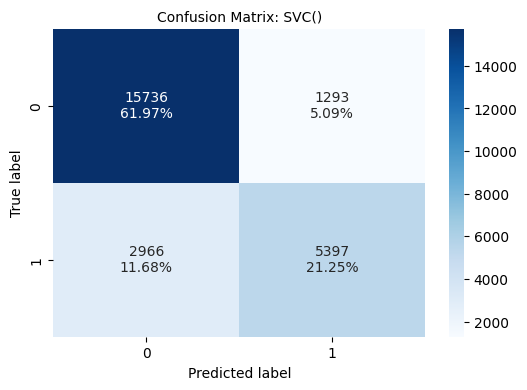

In [ ]:
# compute confusion matrix on train data
confusion_matrix_sklearn(svm_rbf, X_train, y_train)

##### Metrics : SVM-RBF on Train data

In [ ]:
# calculate metrics on train data
model_performance_classification_sklearn(svm_rbf, X_train, y_train)

Accuracy  Recall  Precision   F1
0      0.83    0.65       0.81 0.72

##### Confusion Matrix : SVM-RBF on Test data

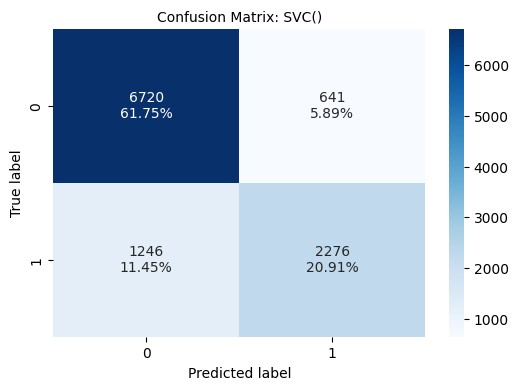

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(svm_rbf, X_test, y_test)

##### Metrics : SVM-RBF on Test data

In [ ]:
# Metrics on test data
model_performance_classification_sklearn(svm_rbf, X_test, y_test)

Accuracy  Recall  Precision   F1
0      0.83    0.65       0.78 0.71

**Observations**:

*The recall rate is suboptimal with the default values of the RBF kernel.

*The metrics for the RBF model are consistent between the training and testing data, indicating that the model is not overfitted.

In [ ]:
# get default gamma value
gama_rbf_s = round(svm_rbf._gamma,4)
gama_rbf_s

0.344

In [ ]:
# get default C value
c_rbf_s = svm_rbf.C
c_rbf_s

1.0

#### SVM - RBF tuning

In [ ]:
def finetune_svm_rbf(predictors, target):

  # initialize req variables
  best_score=0
  best_params={}

  gama_values = [gama_rbf_s/10,gama_rbf_s,gama_rbf_s*10]
  c_values = [c_rbf_s/10,c_rbf_s,c_rbf_s*10]
  model_svms = []
  model_svms_labels = []
  train_recalls = []

  for gama in gama_values:
    for c in c_values:
      start_time = time.time()
      model = SVC(kernel='rbf',gamma=gama, C=c, random_state=1)
      # fit the model
      model.fit(predictors, target)
      model_svms.append(model)
      model_svms_labels.append(f"gamma={gama:.2f},C={c}")
      # compute predictions
      y_predict = model.predict(predictors)
      elapsed_time = time.time() - start_time
      re_score = recall_score(target,y_predict)
      train_recalls.append(re_score)
      print(f"gamma={gama}, C={c}, processing_time={elapsed_time:.2f}s => recall_score={re_score}")
      if re_score > best_score:
        best_score = re_score
        best_params = { 'gamma': gama,
                        'C': c,
                        'score' : re_score,
                        'processing_time' : f"{elapsed_time:.2f}s",
                        'model' : model}

  return best_score, best_params, model_svms, model_svms_labels, train_recalls

In [ ]:
# log the recall rates for different values of gamma and C
rescore_rbf, params_rbf, model_svms, model_svms_labels, train_recalls  = finetune_svm_rbf(X_train, y_train)
params_rbf

gamma=0.0344, C=0.1, processing_time=46.26s => recall_score=0.4439794332177448
gamma=0.0344, C=1.0, processing_time=39.26s => recall_score=0.5866315915341385
gamma=0.0344, C=10.0, processing_time=36.53s => recall_score=0.6147315556618438
gamma=0.344, C=0.1, processing_time=39.47s => recall_score=0.577304794930049
gamma=0.344, C=1.0, processing_time=35.73s => recall_score=0.6453425804137272
gamma=0.344, C=10.0, processing_time=36.44s => recall_score=0.7170871696759537
gamma=3.4399999999999995, C=0.1, processing_time=50.16s => recall_score=0.5645103431782853
gamma=3.4399999999999995, C=1.0, processing_time=53.77s => recall_score=0.76132966638766
gamma=3.4399999999999995, C=10.0, processing_time=73.39s => recall_score=0.83737893100562


{'gamma': 3.4399999999999995,
 'C': 10.0,
 'score': 0.83737893100562,
 'processing_time': '73.39s',
 'model': SVC(C=10.0, gamma=3.4399999999999995, random_state=1)}

In [ ]:
# print the best model in RBF kernel
params_rbf['model']

SVC(C=10.0, gamma=3.4399999999999995, random_state=1)

##### Confusion matrix  : SVM-RBF Optimized on Train data

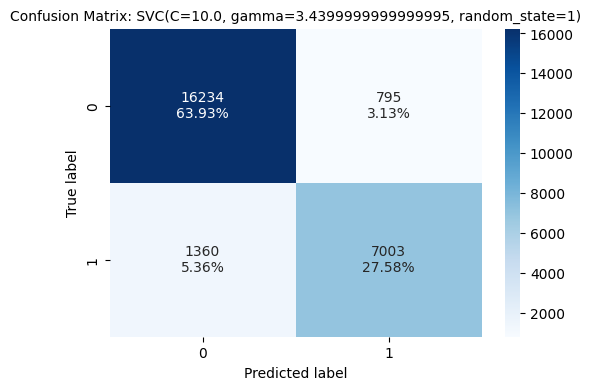

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(params_rbf['model'], X_train, y_train)

##### Metrics : SVM-RBF Optimized on Train data

In [ ]:
# calcualte metrics on train data
model_performance_classification_sklearn(params_rbf['model'], X_train, y_train)

Accuracy  Recall  Precision   F1
0      0.92    0.84       0.90 0.87

##### Confusion matrix : SVM-RBF Optimized on Train data

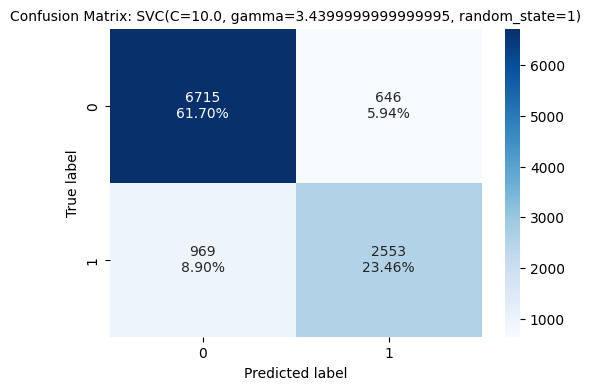

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(params_rbf['model'], X_test, y_test)

##### Metrics : SVM-RBF Optimized on Test data

In [ ]:
# compute metrics on test data
model_performance_classification_sklearn(params_rbf['model'], X_test, y_test)

Accuracy  Recall  Precision   F1
0      0.85    0.72       0.80 0.76

##### Metrics : SVM-RBF Optimized on Train vs Test data

In [ ]:
# Analyze the train and test metrics for SVM RBF
train_test_rbf_opt = pd.concat([model_performance_classification_sklearn(params_rbf['model'], X_train, y_train),
          model_performance_classification_sklearn(params_rbf['model'], X_test, y_test)],
          axis=0)
train_test_rbf_opt.index = ['Train','Test']
train_test_rbf_opt.T

Train  Test
Accuracy    0.92  0.85
Recall      0.84  0.72
Precision   0.90  0.80
F1          0.87  0.76

**Observations**

* The recall rate is excellent on the training data but inconsistent on the test data.
* The metrics show inconsistency between the training and testing data.
* The model is overfitted and lacks generalization.

Further analysis of different hyperparameters is required to fine-tune the model.

In [ ]:
# lets compute test recalls and plot graph for recall on test and train data
tests_recalls_svm = []
for model_svm in model_svms:
  tests_recalls_svm.append(recall_score(y_test,model_svm.predict(X_test)))
tests_recalls_svm

[0.45741056218057924,
 0.597671777399205,
 0.6306076093128904,
 0.58603066439523,
 0.6462237365133446,
 0.7072685973878479,
 0.5488358886996025,
 0.7089721749006247,
 0.7248722316865417]

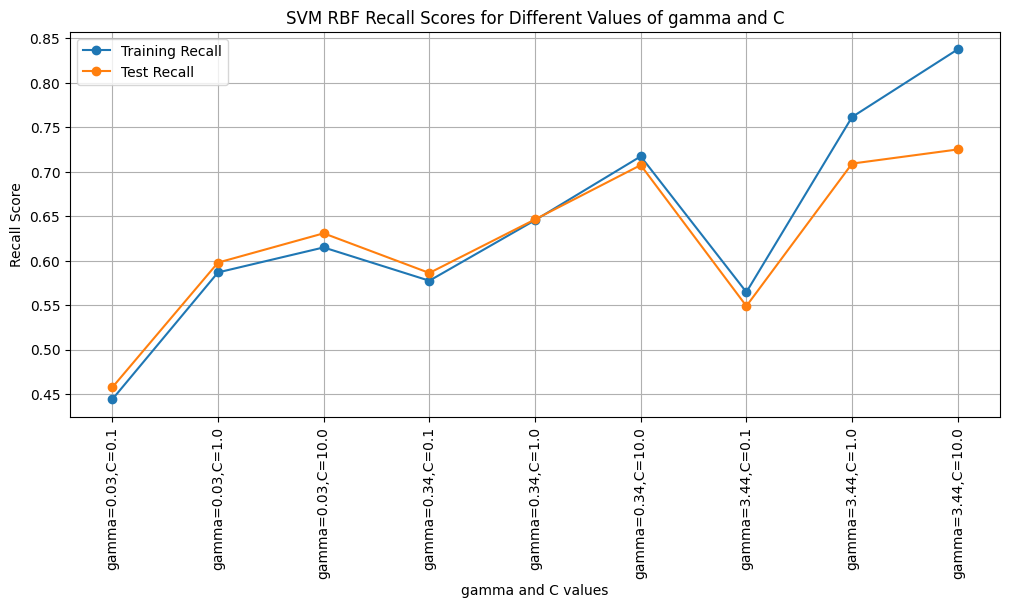

In [ ]:
# Plot recall scores for training and test sets
plt.figure(figsize=(12, 5))
plt.plot(model_svms_labels, train_recalls, label='Training Recall', marker='o')
plt.plot(model_svms_labels, tests_recalls_svm, label='Test Recall', marker='o')
plt.title('SVM RBF Recall Scores for Different Values of gamma and C')
plt.xlabel('gamma and C values')
plt.ylabel('Recall Score')
plt.xticks(model_svms_labels, rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# The second best value is picked that have good recall rate and consistent between
# train and test data
# from the plot it is at 7th index
svm_rbf_idx = 7

In [ ]:
# print the hyper parameters
model_svm_rbf = model_svms[svm_rbf_idx]
model_svm_rbf

SVC(gamma=3.4399999999999995, random_state=1)

##### Confusion Matrix : SVM-RBF Optimized on Train data

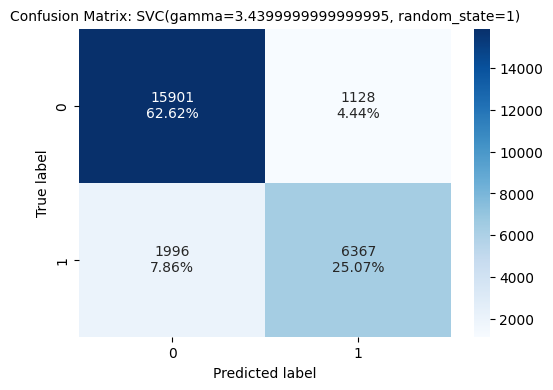

In [ ]:
# compute confusion matrix on train data
confusion_matrix_sklearn(model_svm_rbf, X_train, y_train)

  ##### Metrics : SVM-RBF Optimized on Train data

In [ ]:
# compute metrics on train data
model_performance_classification_sklearn(model_svm_rbf, X_train, y_train)

Accuracy  Recall  Precision   F1
0      0.88    0.76       0.85 0.80

##### Confusion Matrix : SVM-RBF Optimized on Test data

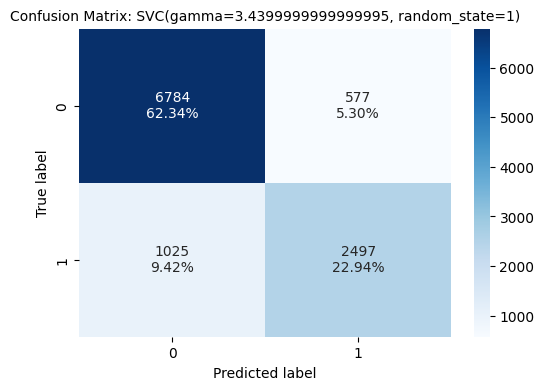

In [ ]:
# compute confusion matrix on test data
confusion_matrix_sklearn(model_svm_rbf, X_test, y_test)

##### Metrics : SVM-RBF Optimized on Test data

In [ ]:
# compute metrics on test data
model_performance_classification_sklearn(model_svm_rbf, X_test, y_test)

Accuracy  Recall  Precision   F1
0      0.85    0.71       0.81 0.76

##### Metrics : SVM-RBF Optimized on Train vs Test data

In [ ]:
# Analyze the train and test metrics for SVM RBF
train_test_rbf = pd.concat([model_performance_classification_sklearn(model_svm_rbf, X_train, y_train),
          model_performance_classification_sklearn(model_svm_rbf, X_test, y_test)],
          axis=0)
train_test_rbf.index = ['Train','Test']
train_test_rbf.T

Train  Test
Accuracy    0.88  0.85
Recall      0.76  0.71
Precision   0.85  0.81
F1          0.80  0.76

**Observations**

* The recall rate is good on the training data
* The metrics show consistency between the training and testing data.
* The model is not overfitted and shows good generalization.

This model is preferred among SVM kernels

### Comparison of models and final model selection

In [ ]:
# Lets compare the metrics for different models on train data
df_comp_models_train = pd.concat([
    model_performance_classification_sklearn(model_lr, X_train, y_train,threshold = optimal_threshold_roc),
    model_performance_classification_sklearn(model_nb, X_train, y_train,threshold = optimal_threshold_roc_nb),
    model_performance_classification_sklearn(model_k_dict[7], X_train, y_train),
    model_performance_classification_sklearn(params_poly['model'], X_train, y_train),
    model_performance_classification_sklearn(model_svm_rbf, X_train, y_train),
], axis=0
)
df_comp_models_train.index=['Linear Regression - ROC Optimized','Naive Bayes - ROC Optimized', 'K-Nearest Neigbors 7','SVM Poly-gamma=3.439-C=10','SVM RBF- gama=3.439-C=1']
df_comp_models_train.T

Linear Regression - ROC Optimized  Naive Bayes - ROC Optimized  \
Accuracy                                0.79                         0.74   
Recall                                  0.75                         0.75   
Precision                               0.66                         0.58   
F1                                      0.70                         0.66   

           K-Nearest Neigbors 7  SVM Poly-gamma=3.439-C=10  \
Accuracy                   0.88                       0.84   
Recall                     0.78                       0.70   
Precision                  0.84                       0.80   
F1                         0.81                       0.75   

           SVM RBF- gama=3.439-C=1  
Accuracy                      0.88  
Recall                        0.76  
Precision                     0.85  
F1                            0.80

In [ ]:
# Lets compare the metrics for different models on test data
df_comp_models_test = pd.concat([
    model_performance_classification_sklearn(model_lr, X_test, y_test,threshold = optimal_threshold_roc),
    model_performance_classification_sklearn(model_nb, X_test, y_test,threshold = optimal_threshold_roc_nb),
    model_performance_classification_sklearn(model_k_dict[7],X_test, y_test),
    model_performance_classification_sklearn(params_poly['model'], X_test, y_test),
    model_performance_classification_sklearn(model_svm_rbf,X_test, y_test),
], axis=0
)
df_comp_models_test.index=['Linear Regression - ROC Optimized','Naive Bayes - ROC Optimized', 'K-Nearest Neigbors 7','SVM Poly-gamma=3.439-C=10','SVM RBF- gama=3.439-C=1']
df_comp_models_test.T

Linear Regression - ROC Optimized  Naive Bayes - ROC Optimized  \
Accuracy                                0.79                         0.72   
Recall                                  0.76                         0.75   
Precision                               0.65                         0.56   
F1                                      0.70                         0.64   

           K-Nearest Neigbors 7  SVM Poly-gamma=3.439-C=10  \
Accuracy                   0.83                       0.83   
Recall                     0.70                       0.68   
Precision                  0.77                       0.76   
F1                         0.73                       0.72   

           SVM RBF- gama=3.439-C=1  
Accuracy                      0.85  
Recall                        0.71  
Precision                     0.81  
F1                            0.76

**Observations**:

* The K-Nearest Neighbors model with K=7 provides the best recall rate among the models analyzed and is therefore chosen.

* The SVM model was not extensively evaluated with various hyperparameters due to high processing times. Although its recall rate is lower than that of KNN, the plots indicate consistent recall metrics, making it a preferred model that warrants further evaluation with higher computational resources.

* The metrics for the above two models are consistent across the training and testing data, confirming that the models are not overfitted and are generalizing effectively.

* The Naive Bayes model achieves a high recall rate but performs poorly in precision, making it unsuitable for selection.

### Insights

* Most bookings are made through online market segment.
* About 33% of bookings are cancelled
* The percentage of repeating guests who cancel is 1.72 %
* The average price increases with higher meal plan categories.
* The average price shows an increasing trend until September, after which it declines.
* Bookings with longer lead times are more likely to be canceled.
* The average room price is slightly higher for canceled reservations compared to non-canceled reservations.
* The lead time follows an increasing trend until September, after which it decreases.
* When a special request is made, approximately 80% of the bookings are not canceled.
* Time features may need to be scaled to account for seasonality.


### Recommendations

* The KNN model with K=7 or the SVM RBF model with gamma=3.4 and C=1 will be deployed in production to predict cancellations.

* The SVM model requires higher resources during training, making it worthwhile for further evaluation.

* Hotel management should effectively handle resources in cases where the model predicts cancellations but no cancellations occur (false positives).

* A feedback loop should be established to validate model performance and fine-tune it further.

* Customers with longer lead times are more likely to cancel; offering incentives for early bookings with discounts can help secure occupancy.

* Pricing should be adjusted based on demand and peak seasons.

* Offer discounts to customers who are likely to cancel their bookings.

* Implement loyalty programs to reward repeat customers and reduce cancellations.